In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# Technical/tactical performance data from FBref
performance_data = pd.read_excel('input_data/fbref_stats.xlsx')
performance_data

,Unnamed: 0,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Playing Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Performance,...,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Aerial Duels,Unnamed: 248,Unnamed: 249
0,NaN,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Ath Paranaense,31,26.2,46.9,38,418,3420,38,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Atl Goianiense,40,26.5,47.4,38,418,3420,38,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,Atlético Mineiro,36,28.1,57.2,38,418,3420,38,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7221,7219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7222,7220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7223,7221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7224,7222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


### Preprocessing - Performance Data

In [3]:
# Remove first column
performance_data = performance_data.iloc[:, 1:]

### Transform second row into header (header does not change in columns where the second row has null value)
# Store old column names
old_columns = performance_data.columns

# Store the first row
new_header_row = performance_data.iloc[0]

# Create new column names: use the new row if not NaN, otherwise keep the old name
new_column_names = [
    new if pd.notna(new) else old
    for new, old in zip(new_header_row, old_columns)
]

# Apply new column names to the DataFrame
performance_data.columns = new_column_names

# Remove the first row, which is now the header
performance_data = performance_data[1:]

# Reset the index
performance_data.reset_index(drop=True, inplace=True)

performance_data

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ath Paranaense,31,26.2,46.9,38,418,3420,38,39,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atl Goianiense,40,26.5,47.4,38,418,3420,38,28,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlético Mineiro,36,28.1,57.2,38,418,3420,38,47,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahia,30,27.7,55.8,38,418,3420,38,49,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


In [4]:
# Remove rows where 'Player' is NaN
performance_data = performance_data.dropna(subset=['Player'])

performance_data

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
41,NaN,NaN,NaN,NaN,3,1,108,1.2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,8,1,268,3.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,8,1,202,2.2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,4,3,334,3.7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,7,6,580,6.4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


In [5]:
# Remove columns that are completely empty
performance_data = performance_data.dropna(axis=1, how='all')

performance_data

,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
41,3,1,108,1.2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,8,1,268,3.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,8,1,202,2.2,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,4,3,334,3.7,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,7,6,580,6.4,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


In [6]:
## Add '_suffix' to duplicate column names
def rename_duplicate_columns(df):
    new_columns = []
    counts = {}

    for col in df.columns:
        if col in counts:
            counts[col] += 1
            new_col = f"{col}_{counts[col]}"
        else:
            counts[col] = 0
            new_col = col
        new_columns.append(new_col)

    df.columns = new_columns
    return df

# Remove unnecessary columns
performance_data.drop(columns=['Stat Category', 'Rk', 'Player Link', 'Matches'], inplace=True)

# Rename duplicate columns
performance_data = rename_duplicate_columns(performance_data).copy()

performance_data

C:\Users\crist\AppData\Local\Temp\ipykernel_27388\174818533.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data.drop(columns=['Stat Category', 'Rk', 'Player Link', 'Matches'], inplace=True)


,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,...,Crs_1,Int_1,TklW_1,PKwon,PKcon,OG_1,Recov,Won,Lost_1,Won%
41,3,1,108,1.2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,8,1,268,3.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,8,1,202,2.2,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,4,3,334,3.7,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,7,6,580,6.4,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


In [7]:
# Reorder columns: move 'Player ID', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born' to the front
first_columns = ['Player ID', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born']

# Get the remaining columns (those not in first_columns)
remaining_columns = [col for col in performance_data.columns if col not in first_columns]

# Reorder columns
performance_data = performance_data[first_columns + remaining_columns].copy()

performance_data

,Player ID,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Crs_1,Int_1,TklW_1,PKwon,PKcon,OG_1,Recov,Won,Lost_1,Won%
41,6c0ef11c,Abner,br BRA,DF,Juventude,19,2004,3,1,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,6140be7b,Nicolás Acevedo,uy URU,"MF,DF",Bahia,24,1999,8,1,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2557c196,Luiz Adriano,br BRA,FW,Vitória,36,1987,8,1,202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,11ad100a,Adriel,br BRA,GK,Bahia,23,2001,4,3,334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,e980e78d,Adryelson,br BRA,DF,Botafogo (RJ),25,1998,7,6,580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,e2add0e7,Yago,br BRA,MF,Bahia,28,1995,NaN,NaN,NaN,...,0,0,3,0,0,0,8,1,0,100.0
7221,a70af595,Bruno Zapelli,ar ARG,"MF,FW",Ath Paranaense,21,2002,NaN,NaN,NaN,...,93,8,19,0,0,0,70,4,17,19.0
7222,803d5265,Federico Zaracho,ar ARG,MF,Atlético Mineiro,25,1998,NaN,NaN,NaN,...,7,13,13,0,0,0,44,8,13,38.1
7223,c816eea6,Zeca,br BRA,DF,Vitória,29,1994,NaN,NaN,NaN,...,18,3,5,0,0,0,21,0,4,0.0


In [8]:
## Some players have multiple rows (e.g., played for multiple teams)
## Group columns by Player ID
## To facilitate, add '.1', '.2', '.3' (and so on) to column names that appear more than once for a single Player ID

def expand_by_player_id(df, fixed_keys):
    grouped = df.groupby('Player ID')
    result_records = []

    for player_id, group in grouped:
        base = group.iloc[0][fixed_keys].copy()
        other_columns = group.drop(columns=fixed_keys)

        result_columns = {}

        for col in other_columns.columns:
            values = group[col].dropna().tolist()

            if not values:
                continue

            # If there's only one value, keep the original column name
            result_columns[col] = values[0]

            # If there's more than one value (even if repeated), create columns with suffix
            for i, val in enumerate(values[1:], start=1):
                result_columns[f"{col}.{i}"] = val

        registro = pd.concat([base, pd.Series(result_columns)], axis=0)
        result_records.append(registro)

    return pd.DataFrame(result_records)

# Fixed keys to keep left
fixed_keys = ['Player ID', 'Player', 'Nation', 'Pos', 'Age', 'Born']

performance_data = expand_by_player_id(performance_data, fixed_keys).copy()

performance_data

,Player ID,Player,Nation,Pos,Age,Born,Squad,Squad.1,Squad.2,Squad.3,...,Launch%_1.1,AvgLen_1.1,Opp.1,Stp.1,Stp%.1,#OPA.1,#OPA/90.1,AvgDist.1,90s_1.14,90s_1.15
0,005ca692,Maycon,br BRA,MF,26,1997,Corinthians,Corinthians,Corinthians,Corinthians,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00672021,Alan Patrick,br BRA,"MF,FW",32,1991,Internacional,Internacional,Internacional,Internacional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,006cd6bd,Marcelo Henrique,br BRA,DF,18,2005,Cuiabá,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0102ca7f,Felipe Jonatan,br BRA,DF,25,1998,Fortaleza,Fortaleza,Fortaleza,Fortaleza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010cf7a3,Alejo Cruz,uy URU,"FW,MF",23,2000,Atl Goianiense,Atl Goianiense,Atl Goianiense,Atl Goianiense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,ff112582,Juan Sforza,ar ARG,MF,21,2002,Vasco da Gama,Vasco da Gama,Vasco da Gama,Vasco da Gama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,ffa1d3c3,Walisson Maia,br BRA,DF,32,1991,Criciúma,Criciúma,Criciúma,Criciúma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,ffb2ce13,Eliel,br BRA,MF,20,2003,Criciúma,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,ffb88c28,Hyoran,br BRA,"FW,MF",30,1993,Internacional,Internacional,Internacional,Internacional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Fill NaN values with 0 for numerical processing
performance_data.fillna(0, inplace=True)

# Convert only the desired columns to numeric, preserving order
extra_columns = ['Player ID', 'Player', 'Nation', 'Pos', 'Squad']
for col in performance_data.columns:
    if not col.startswith(tuple(extra_columns)):
        performance_data[col] = pd.to_numeric(performance_data[col], errors='coerce')

# Remove columns with prefix 'Squad' different from 'Squad' and 'Squad.1'
squad_columns = [col for col in performance_data.columns
                     if col.startswith('Squad') and col not in ['Squad', 'Squad.1']]
performance_data.drop(columns=squad_columns, inplace=True)

# Keep only players with at least 7 full matches
limit_minutes_played = 630
# Convert Min to numeric (in case it is a string - for null values)
performance_data['Min'] = pd.to_numeric(performance_data['Min'], errors='coerce')
performance_data['Min.1'] = pd.to_numeric(performance_data['Min.1'], errors='coerce')
# Sum Min with Min.1 if different, keep Min if equal
performance_data['Min'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Min'] + performance_data['Min.1'],
    performance_data['Min']
)
# Filter players with Min >= 630
performance_data = performance_data[performance_data['Min'] >= limit_minutes_played].copy()

# Players who played for 2 teams should sum '90s' with '90s.' for previous filters.
performance_data['90s'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['90s'] + performance_data['90s.1'],
    performance_data['90s']
)

performance_data

,Player ID,Player,Nation,Pos,Age,Born,Squad,Squad.1,MP,MP.1,...,Launch%_1.1,AvgLen_1.1,Opp.1,Stp.1,Stp%.1,#OPA.1,#OPA/90.1,AvgDist.1,90s_1.14,90s_1.15
1,00672021,Alan Patrick,br BRA,"MF,FW",32,1991,Internacional,Internacional,23,23,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
3,0102ca7f,Felipe Jonatan,br BRA,DF,25,1998,Fortaleza,Fortaleza,22,22,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
4,010cf7a3,Alejo Cruz,uy URU,"FW,MF",23,2000,Atl Goianiense,Atl Goianiense,36,36,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
6,01819e70,Gabriel Menino,br BRA,"MF,FW",23,2000,Palmeiras,Palmeiras,27,27,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
7,01dc4e41,EDU,br BRA,DF,23,2000,Vitória,Vitória,12,12,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,fdf88bc0,Ramon,br BRA,DF,22,2001,Cuiabá,Cuiabá,30,30,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
837,fefa9b9a,Kanu,br BRA,DF,26,1997,Bahia,Bahia,30,30,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
839,ff112582,Juan Sforza,ar ARG,MF,21,2002,Vasco da Gama,Vasco da Gama,26,26,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
840,ffa1d3c3,Walisson Maia,br BRA,DF,32,1991,Criciúma,Criciúma,16,16,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0


In [10]:
## For players who played for two teams, sum the relevant statistics
## Sum the original column with the '.1' column (contains data from the previous and subsequent teams in the championship)
## If the player has only played for one club (i.e., 'Squad' = 'Squad.1'), just keep the original column

# Sum number of yellow cards
performance_data['CrdY'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['CrdY'] + performance_data['CrdY.1'],
    performance_data['CrdY']
)

# Sum number of red cards
performance_data['CrdR'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['CrdR'] + performance_data['CrdR.1'],
    performance_data['CrdR']
)

# Sum number of Goals/90s
performance_data['Gls_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Gls_1'] + performance_data['Gls_1.1'],
    performance_data['Gls_1']
)

# Sum number of Assists/90s
performance_data['Ast_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Ast_1'] + performance_data['Ast_1.1'],
    performance_data['Ast_1']
)

# Sum number of Penalty Goals
performance_data['PK'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PK'] + performance_data['PK.1'],
    performance_data['PK']
)

# Sum number of Penalty Attempts
performance_data['PKatt'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKatt'] + performance_data['PKatt.1'],
    performance_data['PKatt']
)

# Sum number of Penalty Attempts against the goalkeeper
performance_data['PKatt_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKatt_1'] + performance_data['PKatt_1.1'],
    performance_data['PKatt_1']
)

# Sum number of Penalty Attempts
performance_data['PKatt_2'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKatt_2'] + performance_data['PKatt_2.1'],
    performance_data['PKatt_2']
)

# Sum number of penalty goals conceded by the goalkeeper
performance_data['PKA'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKA'] + performance_data['PKA.1'],
    performance_data['PKA']
)

# Sum number of penalty saves by the goalkeeper
performance_data['PKsv'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKsv'] + performance_data['PKsv.1'],
    performance_data['PKsv']
)

# Sum number of penalties won
performance_data['PKwon'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKwon'] + performance_data['PKwon.1'],
    performance_data['PKwon']
)

# Sum number of penalties committed
performance_data['PKcon'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PKcon'] + performance_data['PKcon.1'],
    performance_data['PKcon']
)

# Sum number of Progressive Carries
performance_data['PrgC'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PrgC'] + performance_data['PrgC.1'],
    performance_data['PrgC']
)

# Sum number of Progressive Passes
performance_data['PrgP'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PrgP'] + performance_data['PrgP.1'],
    performance_data['PrgP']
)

# Sum number of Progressive Passes Received
performance_data['PrgR'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['PrgR'] + performance_data['PrgR.1'],
    performance_data['PrgR']
)

# Sum number of shots that led to another shot attempt
performance_data['Sh_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Sh_1'] + performance_data['Sh_1.1'],
    performance_data['Sh_1']
)

# Sum number of shots/90
performance_data['Sh/90'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Sh/90'] + performance_data['Sh/90.1'],
    performance_data['Sh/90']
)

# Sum number of shots on target/90
performance_data['SoT/90'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['SoT/90'] + performance_data['SoT/90.1'],
    performance_data['SoT/90']
)

# Sum number of offsides
performance_data['Off_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Off_1'] + performance_data['Off_1.1'],
    performance_data['Off_1']
)

# Sum number of tackles
performance_data['Tkl'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Tkl'] + performance_data['Tkl.1'],
    performance_data['Tkl']
)

# Sum number of Times Tackled during Take-On
performance_data['Tkld'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Tkld'] + performance_data['Tkld.1'],
    performance_data['Tkld']
)

# Sum number of challenges lost
performance_data['Lost'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Lost'] + performance_data['Lost.1'],
    performance_data['Lost']
)

# Sum number of aerial duels lost
performance_data['Lost_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Lost_1'] + performance_data['Lost_1.1'],
    performance_data['Lost_1']
)

# Sum number of blocks
performance_data['Blocks_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Blocks_1'] + performance_data['Blocks_1.1'],
    performance_data['Blocks_1']
)

# Sum number of interceptions
performance_data['Int'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Int'] + performance_data['Int.1'],
    performance_data['Int']
)

# Sum number of clearances
performance_data['Clr'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Clr'] + performance_data['Clr.1'],
    performance_data['Clr']
)

# Sum number of errors that led to an opponent's shot attempt
performance_data['Err'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Err'] + performance_data['Err.1'],
    performance_data['Err']
)

# Sum number of successful dribbles
performance_data['Succ'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Succ'] + performance_data['Succ.1'],
    performance_data['Succ']
)

# Sum number of completed passes
performance_data['Cmp_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Cmp_1'] + performance_data['Cmp_1.1'],
    performance_data['Cmp_1']
)

# Sum number of total passes
performance_data['Att_2'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Att_2'] + performance_data['Att_2.1'],
    performance_data['Att_2']
)

# Sum number of total Take-Ons
performance_data['Att_8'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Att_8'] + performance_data['Att_8.1'],
    performance_data['Att_8']
)

# Sum number of times the player fails to gain control of the ball
performance_data['Mis'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Mis'] + performance_data['Mis.1'],
    performance_data['Mis']
)

# Sum number of times the player is dispossessed
performance_data['Dis'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Dis'] + performance_data['Dis.1'],
    performance_data['Dis']
)

# Sum number of balls lost recovered
performance_data['Recov'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Recov'] + performance_data['Recov.1'],
    performance_data['Recov']
)

# Sum number of fouls committed
performance_data['Fls'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Fls'] + performance_data['Fls.1'],
    performance_data['Fls']
)

# Sum number of fouls suffered
performance_data['Fld_2'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Fld_2'] + performance_data['Fld_2.1'],
    performance_data['Fld_2']
)

# Sum number of aerial balls won
performance_data['Won'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Won'] + performance_data['Won.1'],
    performance_data['Won']
)

# Sum number of own goals
performance_data['OG_1'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['OG_1'] + performance_data['OG_1.1'],
    performance_data['OG_1']
)

# Sum number of passes in depth
performance_data['TB'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['TB'] + performance_data['TB.1'],
    performance_data['TB']
)

# Sum number of GCA90
performance_data['GCA90'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['GCA90'] + performance_data['GCA90.1'],
    performance_data['GCA90']
)

# Sum number of Expected Goals
performance_data['xG'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['xG'] + performance_data['xG.1'],
    performance_data['xG']
)

# Sum number of Expected Assists
performance_data['xA'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['xA'] + performance_data['xA.1'],
    performance_data['xA']
)

# Sum number of passes to the middle
# Put 'Squad.1' in 'Squad' if the player has played for more than one team
performance_data['Squad'] = np.where(
    performance_data['Squad'] != performance_data['Squad.1'],
    performance_data['Squad'] + '/' + performance_data['Squad.1'],
    performance_data['Squad']
)

# Remove columns that contain a dot in the name (they will no longer be used)
performance_data = performance_data[[col for col in performance_data.columns if '.' not in col]].copy()

performance_data

,Player ID,Player,Nation,Pos,Age,Born,Squad,MP,Starts,Min,...,Att_1,Launch%_1,AvgLen_1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Save%_1
1,00672021,Alan Patrick,br BRA,"MF,FW",32,1991,Internacional,23,20,1777,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
3,0102ca7f,Felipe Jonatan,br BRA,DF,25,1998,Fortaleza,22,17,1510,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
4,010cf7a3,Alejo Cruz,uy URU,"FW,MF",23,2000,Atl Goianiense,36,22,2156,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
6,01819e70,Gabriel Menino,br BRA,"MF,FW",23,2000,Palmeiras,27,11,1067,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
7,01dc4e41,EDU,br BRA,DF,23,2000,Vitória,12,7,744,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,fdf88bc0,Ramon,br BRA,DF,22,2001,Cuiabá,30,30,2636,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
837,fefa9b9a,Kanu,br BRA,DF,26,1997,Bahia,30,30,2700,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
839,ff112582,Juan Sforza,ar ARG,MF,21,2002,Vasco da Gama,26,12,1250,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0
840,ffa1d3c3,Walisson Maia,br BRA,DF,32,1991,Criciúma,16,10,955,...,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0


In [11]:
#### Transform and rename columns to facilitate analysis

for col in performance_data.columns:
    ### Rename and remove columns

    ## Standard Stats
    if col == 'Pos':  # Rename Position
        performance_data.rename(columns={'Pos': 'Position'}, inplace=True)
    elif col == 'Age':  # Rename Age
        performance_data.rename(columns={'Age': 'Age at season start'}, inplace=True)
    elif col == 'Born':  # Rename Year of birth
        performance_data.rename(columns={'Born': 'Year of birth'}, inplace=True)
    elif col == 'MP':  # Matches played does not measure technical performance
        performance_data.drop(columns=['MP'], inplace=True)
    elif col == 'Starts':  # Number of starts does not measure technical performance
        performance_data.drop(columns=['Starts'], inplace=True)
    elif col == 'Min':  # Number of minutes played will be used as it is informative
        performance_data.rename(columns={'Min': 'Minutes Played'}, inplace=True)
    elif col == '90s':  # Number of minutes played/90s will be used for preliminary filtering
        continue
    elif col == 'Gls':  # Keep only Goals/90
        performance_data.drop(columns=['Gls'], inplace=True)
    elif col == 'Ast':  # Keep only Assists/90
        performance_data.drop(columns=['Ast'], inplace=True)
    elif col == 'G+A':  # Goals + Assists - Correlated with G and A
        performance_data.drop(columns=['G+A'], inplace=True)
    elif col == 'G-PK':  # Non-Penalty Goals - Correlated with G and PK
        performance_data.drop(columns=['G-PK'], inplace=True)
    elif col == 'PK':  # Rename
        performance_data.rename(columns={'PK': 'Penalty Goals'}, inplace=True)
    elif col == 'PKatt':  # Penalty Attempts (unnecessary data)
        performance_data.rename(columns={'PKatt': 'Penalties Missed'}, inplace=True)
        # Replace with number of penalties missed
        performance_data['Penalties Missed'] = performance_data['Penalties Missed'] - performance_data['Penalty Goals']
    elif col == 'CrdY':  # Keep only Yellow Cards/90
        performance_data.rename(columns={'CrdY': 'Yellow Cards/90'}, inplace=True)
        performance_data['Yellow Cards/90'] = round(performance_data['Yellow Cards/90'] / performance_data['90s'], 2)
    elif col == 'CrdR':  # Keep only Red Cards/90
        performance_data.rename(columns={'CrdR': 'Red Cards/90'}, inplace=True)
        performance_data['Red Cards/90'] = round(performance_data['Red Cards/90'] / performance_data['90s'], 2)
    elif col == 'xG':  # Expected Goals - Keep only per 90
        performance_data.drop(columns=['xG'], inplace=True)
    elif col == 'npxG':  # Correlated with xG
        performance_data.drop(columns=['npxG'], inplace=True)
    elif col == 'xAG':  # Expected Assisted Goals - Less individual than Expected Assists
        performance_data.drop(columns=['xAG'], inplace=True)
    elif col == 'npxG+xAG':  # Non-Penalty Expected Goals + Expected Assisted Goals - Correlated with npxG and xAG
        performance_data.drop(columns=['npxG+xAG'], inplace=True)
    elif col == 'PrgC':  # Keep only Progressive Carries/90
        performance_data.rename(columns={'PrgC': 'Progressive Carries/90'}, inplace=True)
        performance_data['Progressive Carries/90'] = round(performance_data['Progressive Carries/90'] / performance_data['90s'], 2)
    elif col == 'PrgP':  # Keep only Progressive Passes/90
        performance_data.rename(columns={'PrgP': 'Progressive Passes/90'}, inplace=True)
        performance_data['Progressive Passes/90'] = round(performance_data['Progressive Passes/90'] / performance_data['90s'], 2)
    elif col == 'PrgR':  # Keep only Progressive Passes Received/90
        performance_data.rename(columns={'PrgR': 'Progressive Passes Received/90'}, inplace=True)
        performance_data['Progressive Passes Received/90'] = round(performance_data['Progressive Passes Received/90'] / performance_data['90s'], 2)
    elif col == 'Gls_1':  # Keep only Goals/90
        performance_data.rename(columns={'Gls_1': 'Goals/90'}, inplace=True)
    elif col == 'Ast_1':  # Keep only Assists/90
        performance_data.rename(columns={'Ast_1': 'Assists/90'}, inplace=True)
    elif col == 'G+A_1':  # Goals and Assists/90 - Correlated with G and A
        performance_data.drop(columns=['G+A_1'], inplace=True)
    elif col == 'G-PK_1':  # Non-Penalty Goals/90 - Correlated with G and PK
        performance_data.drop(columns=['G-PK_1'], inplace=True)
    elif col == 'G+A-PK':  # Rename
        performance_data.drop(columns=['G+A-PK'], inplace=True)
    elif col == 'xG_1':  # Expected Goals/90 - Rename
        performance_data.rename(columns={'xG_1': 'Expected Goals/90'}, inplace=True)
    elif col == 'xAG_1':  # Expected Assisted Goals - Less individual than Expected Assists
        performance_data.drop(columns=['xAG_1'], inplace=True)
    elif col == 'xG+xAG':  # Expected Goals and Assisted Goals/90 - Correlated with xG and xAG
        performance_data.drop(columns=['xG+xAG'], inplace=True)
    elif col == 'npxG_1':  # Non-Penalty Expected Goals - Correlated with Expected Goals
        performance_data.drop(columns=['npxG_1'], inplace=True)
    elif col == 'npxG+xAG_1':  # Non-Penalty Expected Goals and Expected Assisted Goals/90 - Correlated with xG and xAG
        performance_data.drop(columns=['npxG+xAG_1'], inplace=True)

    ## Goalkeeping
    elif col == 'GA':  # Keep only per 90
        performance_data.drop(columns=['GA'], inplace=True)
    elif col == 'GA90':  # Rename
        performance_data.rename(columns={'GA90': 'Goals Against/90'}, inplace=True)
    elif col == 'SoTA':  # Total number of shots on target against the goalkeeper does not measure individual technical performance of the goalkeeper
        performance_data.drop(columns=['SoTA'], inplace=True)
    elif col == 'Saves':  # Change to per 90
        performance_data.rename(columns={'Saves': 'Saves/90'}, inplace=True)
        performance_data['Saves/90'] = round(performance_data['Saves/90'] / performance_data['90s'], 2)
    elif col == 'Save%':  # Percentage of saves per shots on target is unnecessary
        performance_data.drop(columns=['Save%'], inplace=True)
    elif col == 'W':  # More of a collective attribute than individual
        performance_data.drop(columns=['W'], inplace=True)
    elif col == 'D':  # More of a collective attribute than individual
        performance_data.drop(columns=['D'], inplace=True)
    elif col == 'L':  # More of a collective attribute than individual
        performance_data.drop(columns=['L'], inplace=True)
    elif col == 'CS':  # Rename
        performance_data.rename(columns={'CS': 'Clean Sheets'}, inplace=True)
    elif col == 'CS%':  # Percentage of clean sheets per matches started as a starter is unnecessary
        # Replace with Non-Clean Sheets
        performance_data.rename(columns={'CS%': 'Non-Clean Sheets'}, inplace=True)
        performance_data['Non-Clean Sheets'] = performance_data['Completed Matches'] - performance_data['Clean Sheets']
        # Divide Clean Sheets and Non-Clean Sheets by 90s
        # Since Clean Sheets is the number of complete games in which the goalkeeper did not concede a goal, it makes more sense to divide by 'Completed Matches' for normalization
        performance_data.rename(columns={'Non-Clean Sheets': 'Non-Clean Sheets/Complete Matches Played'}, inplace=True)
        performance_data.rename(columns={'Clean Sheets': 'Clean Sheets/Complete Matches Played'}, inplace=True)
        performance_data['Non-Clean Sheets/Complete Matches Played'] = round(performance_data['Non-Clean Sheets/Complete Matches Played'] / performance_data['Completed Matches'], 2)
        performance_data['Clean Sheets/Complete Matches Played'] = round(performance_data['Clean Sheets/Complete Matches Played'] / performance_data['Completed Matches'], 2)
    elif col == 'PKatt_1':  # Penalty attempts against the goalkeeper is unnecessary
        performance_data.drop(columns=['PKatt_1'], inplace=True)
    elif col == 'PKA':  # Rename
        performance_data.rename(columns={'PKA': 'Penalties Allowed'}, inplace=True)
    elif col == 'PKsv':  # Rename
        performance_data.rename(columns={'PKsv': 'Penalties Saved'}, inplace=True)
    elif col == 'PKm':  # Penalty kicks missed outside or on the post do not measure individual technical performance of the goalkeeper
        performance_data.drop(columns=['PKm'], inplace=True)
    elif col == 'Save%_1':  # Unnecessary - penalty save rate
        performance_data.drop(columns=['Save%_1'], inplace=True)

    ## Advanced Goalkeeping
    elif col == 'GA_1':  # Ignore (already used goals allowed by the goalkeeper)
        performance_data.drop(columns=['GA_1'], inplace=True)
    elif col == 'PKA_1':  # Penalties Allowed (already used)
        performance_data.drop(columns=['PKA_1'], inplace=True)
    elif col == 'FK':  # Remove Free Kick Goals Against (already have Goals Against)
        performance_data.drop(columns=['FK'], inplace=True)
    elif col == 'CK':  # Remove Corner Kick Goals Against (already have Goals Against)
        performance_data.drop(columns=['CK'], inplace=True)
    elif col == 'OG':  # Remove Own Goals Against (already have Goals Against)
        performance_data.drop(columns=['OG'], inplace=True)
    elif col == 'PSxG':  # Rename and divide by 90s
        performance_data.rename(columns={'PSxG': 'Post-Shot Expected Goals/90'}, inplace=True)
        performance_data['Post-Shot Expected Goals/90'] = round(performance_data['Post-Shot Expected Goals/90'] / performance_data['90s'], 2)
    elif col == 'PSxG/SoT':  # Post-Shot Expected Goals per Shot on Target - Redundant due to already used variables
        performance_data.drop(columns=['PSxG/SoT'], inplace=True)
    elif col == 'PSxG+/-':  # Post-Shot Expected Goals minus Goals Allowed - Redundant due to already used variables
        performance_data.drop(columns=['PSxG+/-'], inplace=True)
    elif col == '/90':  # Post-Shot Expected Goals minus Goals Allowed/90 - Redundant due to already used variables
        performance_data.drop(columns=['/90'], inplace=True)
    elif col == 'Cmp':  # Lançamentos certos feitos pelo goleiro - Information of total correct and incorrect passes will be sufficient and will appear in a later column
        performance_data.drop(columns=['Cmp'], inplace=True)
    elif col == 'Att':  # Total attempts of throws made by the goalkeeper (unnecessary)
        performance_data.drop(columns=['Att'], inplace=True)
    elif col == 'Cmp%':  # Unnecessary - Rate of Throws Completed by the Goalkeeper
        performance_data.drop(columns=['Cmp%'], inplace=True)
    elif col == 'Att (GK)':  # Passes made by the goalkeeper - Information of total correct and incorrect passes will be sufficient and will appear in a later column
        performance_data.drop(columns=['Att (GK)'], inplace=True)
    elif col == 'Thr':  # Passes made with the hand by the goalkeeper - Information of total correct and incorrect passes will be sufficient and will appear in a later column
        performance_data.drop(columns=['Thr'], inplace=True)
    elif col == 'Launch%':  # Unnecessary - Rate of Goalkeeper Passes that were launches
        performance_data.drop(columns=['Launch%'], inplace=True)
    elif col == 'AvgLen':  # Average length of goalkeeper throws does not directly indicate performance
        performance_data.drop(columns=['AvgLen'], inplace=True)
    elif col == 'Att_1': # Total attempts of goal kicks are not relevant
        # Could include correct and incorrect goal kicks, but this information is not available
        performance_data.drop(columns=['Att_1'], inplace=True)
    elif col == 'Launch%_1':  # Unnecessary - Rate of Goalkeeper Goal Kicks that were more than 40 yards
        performance_data.drop(columns=['Launch%_1'], inplace=True)
    elif col == 'AvgLen_1':  # Average length of goalkeeper goal kicks does not directly indicate performance
        performance_data.drop(columns=['AvgLen_1'], inplace=True)
    elif col == 'Opp':  # Crosses Faced - Replace with Not Stopped Crosses
        performance_data.rename(columns={'Opp': 'Not Stopped Crosses/90'}, inplace=True)
        performance_data['Not Stopped Crosses/90'] = performance_data['Not Stopped Crosses/90'] - performance_data['Stp']
        # Divide by 90s
        performance_data['Not Stopped Crosses/90'] = round(performance_data['Not Stopped Crosses/90'] / performance_data['90s'], 2)
    elif col == 'Stp':  # Rename
        performance_data.rename(columns={'Stp': 'Crosses Stopped/90'}, inplace=True)
        # Divide by 90s
        performance_data['Crosses Stopped/90'] = round(performance_data['Crosses Stopped/90'] / performance_data['90s'], 2)
    elif col == 'Stp%':  # Unnecessary - Crosses Stopped %
        performance_data.drop(columns=['Stp%'], inplace=True)
    elif col == '#OPA':  # Keep only per 90
        performance_data.drop(columns=['#OPA'], inplace=True)
    elif col == '#OPA/90':  # Rename
        performance_data.rename(columns={'#OPA/90': 'Defensive Actions Outside Penalty Area/90'}, inplace=True)
    elif col == 'AvgDist':  # Average distance of the goalkeeper from the goal in all defensive actions does not directly indicate performance
        performance_data.drop(columns=['AvgDist'], inplace=True)

    ## Shooting
    elif col == 'Gls_2':  # Ignore (already kept Goals/90)
        performance_data.drop(columns=['Gls_2'], inplace=True)
    elif col == 'Sh':  # Keep only Shots On and Off Target
        performance_data.drop(columns=['Sh'], inplace=True)
    elif col == 'SoT':  # Keep only per 90
        performance_data.drop(columns=['SoT'], inplace=True)
    elif col == 'SoT%':  # Percentage of shots that were on target
        # Replace with Shots Off Target
        performance_data.rename(columns={'SoT%': 'Shots off Target/90'}, inplace=True)
        performance_data['Shots off Target/90'] = performance_data['Sh/90'] - performance_data['Shots on Target/90']
        # Remove 'Sh/90' (no longer used)
        performance_data.drop(columns=['Sh/90'], inplace=True)
    elif col == 'Sh/90':  # Keep only Shots On and Off Target
        # Remove after use
        continue
    elif col == 'SoT/90':
        performance_data.rename(columns={'SoT/90': 'Shots on Target/90'}, inplace=True)
    elif col == 'G/Sh':  # Goals per Shot - Redundant due to already used variables
        performance_data.drop(columns=['G/Sh'], inplace=True)
    elif col == 'G/SoT':  # Goals per Shot on Target - Redundant due to already used variables
        performance_data.drop(columns=['G/SoT'], inplace=True)
    elif col == 'Dist':  # Average distance from goal of all shots does not directly indicate performance
        performance_data.drop(columns=['Dist'], inplace=True)
    elif col == 'FK_1':  # Free kick shots do not directly indicate performance
        performance_data.drop(columns=['FK_1'], inplace=True)
    elif col == 'PK_1':  # Ignore penalty goals (already used)
        performance_data.drop(columns=['PK_1'], inplace=True)
    elif col == 'PKatt_2':  # Unnecessary (penalty attempts)
        performance_data.drop(columns=['PKatt_2'], inplace=True)
    elif col == 'xG_2':  # Expected Goals/90 already kept
        performance_data.drop(columns=['xG_2'], inplace=True)
    elif col == 'npxG_2':  # Ignore Non-Penalty Goals (already used)
        performance_data.drop(columns=['npxG_2'], inplace=True)
    elif col == 'npxG/Sh':  # Non-Penalty Expected Goals per Shot - Redundant due to already used variables
        performance_data.drop(columns=['npxG/Sh'], inplace=True)
    elif col == 'G-xG':  # Goals minus Expected Goals - Redundant due to already used variables
        performance_data.drop(columns=['G-xG'], inplace=True)
    elif col == 'np:G-xG':  # Non-Penalty Expected Goals minus Expected Goals - Redundant due to already used variables
        performance_data.drop(columns=['np:G-xG'], inplace=True)

    ## Passing
    elif col == 'Cmp_1':  # Progressive Passes already sufficient
        # Remove after use
        continue
    elif col == 'Att_2':  # Total pass attempts not relevant
        # Replace with Missed Passes
        performance_data.rename(columns={'Att_2': 'Missed Passes'}, inplace=True)
        performance_data['Missed Passes'] = performance_data['Missed Passes'] - performance_data['Cmp_1']
        # Divide Missed Passes by 90s
        performance_data.rename(columns={'Missed Passes': 'Missed Passes/90'}, inplace=True)
        performance_data['Missed Passes/90'] = round(performance_data['Missed Passes/90'] / performance_data['90s'], 2)
        # Remove 'Cmp_1' (no longer used)
        performance_data.drop(columns=['Cmp_1'], inplace=True)
    elif col == 'Cmp%_1':  # Unnecessary - Pass completion rate
        performance_data.drop(columns=['Cmp%_1'], inplace=True)
    elif col == 'TotDist':  # Total pass distance does not directly indicate performance
        performance_data.drop(columns=['TotDist'], inplace=True)
    elif col == 'PrgDist':  # Total progressive pass distance does not directly indicate performance
        performance_data.drop(columns=['PrgDist'], inplace=True)
    elif col == 'Cmp_2':  # Short passes unnecessary
        performance_data.drop(columns=['Cmp_2'], inplace=True)
    elif col == 'Att_3':  # Short passes unnecessary
        performance_data.drop(columns=['Att_3'], inplace=True)
    elif col == 'Cmp%_2':  # Unnecessary - Short pass completion rate
        performance_data.drop(columns=['Cmp%_2'], inplace=True)
    elif col == 'Cmp_3':  # Medium passes unnecessary
        performance_data.drop(columns=['Cmp_3'], inplace=True)
    elif col == 'Att_4':  # Medium passes unnecessary
        performance_data.drop(columns=['Att_4'], inplace=True)
    elif col == 'Cmp%_3':  # Unnecessary - Medium pass completion rate
        performance_data.drop(columns=['Cmp%_3'], inplace=True)
    elif col == 'Cmp_4':  # Long passes unnecessary
        performance_data.drop(columns=['Cmp_4'], inplace=True)
    elif col == 'Att_5':  # Long passes unnecessary
        performance_data.drop(columns=['Att_5'], inplace=True)
    elif col == 'Cmp%_4':  # Unnecessary - Long pass completion rate
        performance_data.drop(columns=['Cmp%_4'], inplace=True)
    elif col == 'Ast_2':  # Ignore assists (already used)
        performance_data.drop(columns=['Ast_2'], inplace=True)
    elif col == 'xAG_2':  # Ignore expected assisted goals (already used)
        performance_data.drop(columns=['xAG_2'], inplace=True)
    elif col == 'xA':  # Expected Assists - Rename and divide by 90s
        performance_data.rename(columns={'xA': 'Expected Assists/90'}, inplace=True)
        performance_data['Expected Assists/90'] = round(performance_data['Expected Assists/90'] / performance_data['90s'], 2)
    elif col == 'A-xAG':  # Assists minus Expected Assisted Goals - Redundant due to already used variables
        performance_data.drop(columns=['A-xAG'], inplace=True)
    elif col == 'KP':  # Key Passes - Correlated with Expected Assists
        performance_data.drop(columns=['KP'], inplace=True)
    elif col == '1/3':  # Passes into Final Third (correlated with Progressive Passes)
        performance_data.drop(columns=['1/3'], inplace=True)
    elif col == 'PPA':  # Passes into Penalty Area - Correlated with Expected Assists
        performance_data.drop(columns=['PPA'], inplace=True)
    elif col == 'CrsPA':  # NNo information on Completed Crosses into Penalty Area and attempts alone do not directly measure performance
        performance_data.drop(columns=['CrsPA'], inplace=True)
    elif col == 'PrgP_1':  # Ignore Progressive Passes (already used)
        performance_data.drop(columns=['PrgP_1'], inplace=True)

    ## Pass Types
    elif col == 'Att_6':  # Total pass attempts not relevant
        performance_data.drop(columns=['Att_6'], inplace=True)
    elif col == 'Live':  # No information on Completed Live-Ball Passes
        performance_data.drop(columns=['Live'], inplace=True)
    elif col == 'Dead':  # No information on Completed Dead-Ball Passes
        performance_data.drop(columns=['Dead'], inplace=True)
    elif col == 'FK_2':  # No information on Completed Passes from Free Kicks
        performance_data.drop(columns=['FK_2'], inplace=True)
    elif col == 'TB':  # Through Balls Completed - Rename and divide by 90s
        performance_data.rename(columns={'TB': 'Through Balls/90'}, inplace=True)
        performance_data['Through Balls/90'] = round(performance_data['Through Balls/90'] / performance_data['90s'], 2)
    elif col == 'Sw':  # No information on Completed Switches
        performance_data.drop(columns=['Sw'], inplace=True)
    elif col == 'Crs':  # No information on Completed Crosses
        performance_data.drop(columns=['Crs'], inplace=True)
    elif col == 'TI':  # No information on Completed Throw-ins Taken
        performance_data.drop(columns=['TI'], inplace=True)
    elif col == 'CK_1':  # No information on Completed Corner Kicks
        performance_data.drop(columns=['CK_1'], inplace=True)
    elif col == 'In':  # No information on Inswinging Corner Kicks
        performance_data.drop(columns=['In'], inplace=True)
    elif col == 'Out':  # No information on Outswinging Corner Kicks
        performance_data.drop(columns=['Out'], inplace=True)
    elif col == 'Str':  # No information on Straight Corner Kicks
        performance_data.drop(columns=['Str'], inplace=True)
    elif col == 'Cmp_5':  # Ignore completed passes
        performance_data.drop(columns=['Cmp_5'], inplace=True)
    elif col == 'Off': # Offside passes do not matter (what matters are short/medium/long wrong passes (already have))
        performance_data.drop(columns=['Off'], inplace=True)
    elif col == 'Blocks':  # Blocked passes do not matter (what matters are short/medium/long wrong passes (already have))
        performance_data.drop(columns=['Blocks'], inplace=True)

    ## Goal and Shot Creation
    elif col == 'SCA':  # Keep only Shot-Creating Actions/90
        performance_data.drop(columns=['SCA'], inplace=True)
    elif col == 'SCA90':  # Shot-Creating Actions - Correlated with Assists, Key Passes...
        performance_data.drop(columns=['SCA90'], inplace=True)
    elif col == 'PassLive':  # Ignore (SCA (Live-ball Pass) does not matter)
        performance_data.drop(columns=['PassLive'], inplace=True)
    elif col == 'PassDead':  # Ignore (SCA (Dead-ball Pass) does not matter)
        performance_data.drop(columns=['PassDead'], inplace=True)
    elif col == 'TO':  # Ignore (SCA (Take-On) does not matter)
        performance_data.drop(columns=['TO'], inplace=True)
    elif col == 'Sh_1':  # Ignore (SCA (Shot) does not matter)
        performance_data.drop(columns=['Sh_1'], inplace=True)
    elif col == 'Fld':  # Ignore (SCA (Fouls Drawn) does not matter)
        performance_data.drop(columns=['Fld'], inplace=True)
    elif col == 'Def':  # Ignore (SCA (Defensive Action) does not matter)
        performance_data.drop(columns=['Def'], inplace=True)
    elif col == 'GCA':  # Keep only Goal-Creating Actions/90
        performance_data.drop(columns=['GCA'], inplace=True)
    elif col == 'GCA90':  # Goal-Creating Actions/90 - Rename
        performance_data.rename(columns={'GCA90': 'Goal-Creating Actions/90'}, inplace=True)
    elif col == 'PassLive_1':  # Ignore (GCA (Live-ball Pass) does not matter)
        performance_data.drop(columns=['PassLive_1'], inplace=True)
    elif col == 'PassDead_1':  # Ignore (GCA (Dead-ball Pass) does not matter)
        performance_data.drop(columns=['PassDead_1'], inplace=True)
    elif col == 'TO_1':  # Ignore (GCA (Take-On) does not matter)
        performance_data.drop(columns=['TO_1'], inplace=True)
    elif col == 'Sh_2':  # Ignore (GCA (Shot) does not matter)
        performance_data.drop(columns=['Sh_2'], inplace=True)
    elif col == 'Fld_1':  # Ignore (type of GCA does not matter)
        performance_data.drop(columns=['Fld_1'], inplace=True)
    elif col == 'Def_1':  # Ignore (GCA (Defensive Action) does not matter)
        performance_data.drop(columns=['Def_1'], inplace=True)

    ## Defensive Actions
    elif col == 'Tkl':  # Total of Tackles - Rename
        performance_data.rename(columns={'Tkl': 'Tackles/90'}, inplace=True)
        performance_data['Tackles/90'] = round(performance_data['Tackles/90'] / performance_data['90s'], 2)
    elif col == 'TklW':  # Tackles Won - Correlated with Tackles
        performance_data.drop(columns=['TklW'], inplace=True)
    elif col == 'Def 3rd':  # Tackle (Def 3rd) does not matter
        performance_data.drop(columns=['Def 3rd'], inplace=True)
    elif col == 'Mid 3rd':  # Tackle (Mid 3rd) does not matter
        performance_data.drop(columns=['Mid 3rd'], inplace=True)
    elif col == 'Att 3rd':  # Tackle (Att 3rd) does not matter
        performance_data.drop(columns=['Att 3rd'], inplace=True)
    elif col == 'Tkl_1':  # Tackles in dribble challenges - Correlated with Tackles
        performance_data.drop(columns=['Tkl_1'], inplace=True)
    elif col == 'Att_7':  # Ignore total dribble challenge attempts
        performance_data.drop(columns=['Att_7'], inplace=True)
    elif col == 'Tkl%':  # Dribblers Tackled Rate (unnecessary)
        performance_data.drop(columns=['Tkl%'], inplace=True)
    elif col == 'Lost':  # Dribble challenges lost - Rename and divide by 90s
        performance_data.rename(columns={'Lost': 'Challenges Lost/90'}, inplace=True)
        performance_data['Challenges Lost/90'] = round(performance_data['Challenges Lost/90'] / performance_data['90s'], 2)
    elif col == 'Blocks_1':  # Keep per 90
        performance_data.rename(columns={'Blocks_1': 'Blocks/90'}, inplace=True)
        performance_data['Blocks/90'] = round(performance_data['Blocks/90'] / performance_data['90s'], 2)
    elif col == 'Sh_3':  # Type of Block does not matter
        performance_data.drop(columns=['Sh_3'], inplace=True)
    elif col == 'Pass':  # Type of Block does not matter
        performance_data.drop(columns=['Pass'], inplace=True)
    elif col == 'Int':  # Rename and divide by 90s
        performance_data.rename(columns={'Int': 'Interceptions/90'}, inplace=True)
        performance_data['Interceptions/90'] = round(performance_data['Interceptions/90'] / performance_data['90s'], 2)
    elif col == 'Tkl+Int':  # Tackles + Interceptions - Redundant as it contains variables already used
        performance_data.drop(columns=['Tkl+Int'], inplace=True)
    elif col == 'Clr':  # Rename and divide by 90s
        performance_data.rename(columns={'Clr': 'Clearances/90'}, inplace=True)
        performance_data['Clearances/90'] = round(performance_data['Clearances/90'] / performance_data['90s'], 2)
    elif col == 'Err':  # Rename and divide by 90s
        performance_data.rename(columns={'Err': 'Errors/90'}, inplace=True)
        performance_data['Errors/90'] = round(performance_data['Errors/90'] / performance_data['90s'], 2)

    ## Possession
    elif col == 'Touches':  # Correlated with other variables and does not directly measure performance
        performance_data.drop(columns=['Touches'], inplace=True)
    elif col == 'Def Pen':  # Touch (Def Pen) does not matter
        performance_data.drop(columns=['Def Pen'], inplace=True)
    elif col == 'Def 3rd_1':  # Touch (Def 3rd) does not matter
        performance_data.drop(columns=['Def 3rd_1'], inplace=True)
    elif col == 'Mid 3rd_1':  # Touch (Mid 3rd) does not matter
        performance_data.drop(columns=['Mid 3rd_1'], inplace=True)
    elif col == 'Att 3rd_1':  # Touch (Att 3rd) does not matter
        performance_data.drop(columns=['Att 3rd_1'], inplace=True)
    elif col == 'Att Pen':  # Touch (Att Pen) does not matter
        performance_data.drop(columns=['Att Pen'], inplace=True)
    elif col == 'Live_1':  # Ignore (Touch on the ball while it is rolling does not matter)
        performance_data.drop(columns=['Live_1'], inplace=True)
    elif col == 'Att_8':  # Total Take-On Attempts (unnecessary)
        # Remove after use
        continue
    elif col == 'Succ':  # Successful dribbles - Rename
        performance_data.rename(columns={'Succ': 'Succesfull Take-Ons'}, inplace=True)
    elif col == 'Succ%':  # Unnecessary - Successful Take-Ons Rate
        performance_data.drop(columns=['Succ%'], inplace=True)
    elif col == 'Tkld':  # Better to have total number of Unsuccessful Take-Ons than just Times Tackled During Take-On
        performance_data.rename(columns={'Tkld': 'Unsuccesfull Take-Ons'}, inplace=True)
        performance_data['Unsuccesfull Take-Ons'] = performance_data['Att_8'] - performance_data['Succesfull Take-Ons']
        # Divide Succesfull and Unsuccesfull Take-Ons by 90s
        performance_data.rename(columns={'Unsuccesfull Take-Ons': 'Unsuccesfull Take-Ons/90'}, inplace=True)
        performance_data.rename(columns={'Succesfull Take-Ons': 'Succesfull Take-Ons/90'}, inplace=True)
        performance_data['Unsuccesfull Take-Ons/90'] = round(performance_data['Unsuccesfull Take-Ons/90'] / performance_data['90s'], 2)
        performance_data['Succesfull Take-Ons/90'] = round(performance_data['Succesfull Take-Ons/90'] / performance_data['90s'], 2)
        # Remove Total Take-On Attempts after use (unnecessary)
        performance_data.drop(columns=['Att_8'], inplace=True)
    elif col == 'Tkld%':  # Unnecessary - Tackled During Take-On Percentage
        performance_data.drop(columns=['Tkld%'], inplace=True)
    elif col == 'Carries':  # Carries - Only Progressive Carries are sufficient
        performance_data.drop(columns=['Carries'], inplace=True)
    elif col == 'TotDist_1':  # Total Carrying Distance - Only Progressive Carries are sufficient
        performance_data.drop(columns=['TotDist_1'], inplace=True)
    elif col == 'PrgDist_1':  # Progressive Carrying Distance - Only Progressive Carries are sufficient
        performance_data.drop(columns=['PrgDist_1'], inplace=True)
    elif col == 'PrgC_1':  # Ignore Progressive Carries (already used)
        performance_data.drop(columns=['PrgC_1'], inplace=True)
    elif col == '1/3_1':  # Carries into Final Third (correlated with Progressive Carries)
        performance_data.drop(columns=['1/3_1'], inplace=True)
    elif col == 'CPA':  # Carries into Penalty Area - Correlated with Progressive Carries
        performance_data.drop(columns=['CPA'], inplace=True)
    elif col == 'Mis':  # Rename and divide by 90s
        performance_data.rename(columns={'Mis': 'Miscontrols/90'}, inplace=True)
        performance_data['Miscontrols/90'] = round(performance_data['Miscontrols/90'] / performance_data['90s'], 2)
    elif col == 'Dis':  # Rename and divide by 90s
        performance_data.rename(columns={'Dis': 'Dispossessed/90'}, inplace=True)
        performance_data['Dispossessed/90'] = round(performance_data['Dispossessed/90'] / performance_data['90s'], 2)
    elif col == 'Rec':  # Passes Received - Only Progressive Passes Received are sufficient
        performance_data.drop(columns=['Rec'], inplace=True)
    elif col == 'PrgR_1':  # Ignore Progressive Passes Received (already used)
        performance_data.drop(columns=['PrgR_1'], inplace=True)

    ## Playing Time
    elif col == 'Mn/MP':  # Minutes/Matches Played does not measure technical performance
        performance_data.drop(columns=['Mn/MP'], inplace=True)
    elif col == 'Min%':  # Percentage of Squad Minutes Played does not measure technical performance
        performance_data.drop(columns=['Min%'], inplace=True)
    elif col == '90s_1':  # Minutes played per 90s (already used)
        performance_data.drop(columns=['90s_1'], inplace=True)
    elif col == 'Starts_1':  # NNumber of matches started (already used)
        performance_data.drop(columns=['Starts_1'], inplace=True)
    elif col == 'Mn/Start':  # Minutes/Matches Started does not measure technical performance
        performance_data.drop(columns=['Mn/Start'], inplace=True)
    elif col == 'Compl':  # Completed Matches will be used as it is informative
        performance_data.rename(columns={'Compl': 'Completed Matches'}, inplace=True)
    elif col == 'Subs':  # Substitute appearances does not measure technical performance
        performance_data.drop(columns=['Subs'], inplace=True)
    elif col == 'Mn/Sub':  # Minutes per substitution does not measure technical performance
        performance_data.drop(columns=['Mn/Sub'], inplace=True)
    elif col == 'unSub':  # Matches as Unused Sub does not measure technical performance
        performance_data.drop(columns=['unSub'], inplace=True)
    elif col == 'PPM':  # Points per match does not measure individual player performance
        performance_data.drop(columns=['PPM'], inplace=True)
    elif col == 'onG':  # Goals scored by team while on pitch does not measure individual player performance
        performance_data.drop(columns=['onG'], inplace=True)
    elif col == 'onGA':  # Goals allowed by team while on pitch does not measure individual player performance
        performance_data.drop(columns=['onGA'], inplace=True)
    elif col == '+/-':  # onG - onGA does not measure individual player performance
        performance_data.drop(columns=['+/-'], inplace=True)
    elif col == '+/-90':  # (onG - onGA)/90s does not measure individual player performance
        performance_data.drop(columns=['+/-90'], inplace=True)
    elif col == 'On-Off':  # (onG - onGA)/90s Net does not measure individual player performance
        performance_data.drop(columns=['On-Off'], inplace=True)
    elif col == 'onxG':  # xG by team while on pitch does not measure individual player performance
        performance_data.drop(columns=['onxG'], inplace=True)
    elif col == 'onxGA':  # xGA by team while on pitch does not measure individual player performance
        performance_data.drop(columns=['onxGA'], inplace=True)
    elif col == 'xG+/-':  # (onxG - onxGA) does not measure individual player performance
        performance_data.drop(columns=['xG+/-'], inplace=True)
    elif col == 'xG+/-90':  # (onxG - onxGA)/90s does not measure individual player performance
        performance_data.drop(columns=['xG+/-90'], inplace=True)
    elif col == 'On-Off_1':  # (onxG - onxGA)/90s Net does not measure individual player performance
        performance_data.drop(columns=['On-Off_1'], inplace=True)

    ## Miscellaneous
    elif col == 'CrdY_1':  # Yellow cards already used
        performance_data.drop(columns=['CrdY_1'], inplace=True)
    elif col == 'CrdR_1':  # Red cards already used
        performance_data.drop(columns=['CrdR_1'], inplace=True)
    elif col == '2CrdY':  # Unnecessary - already have yellow and red cards
        performance_data.drop(columns=['2CrdY'], inplace=True)
    elif col == 'Fls':  # Rename and divide by 90s
        performance_data.rename(columns={'Fls': 'Fouls Commited/90'}, inplace=True)
        performance_data['Fouls Commited/90'] = round(performance_data['Fouls Commited/90'] / performance_data['90s'], 2)
    elif col == 'Fld_2':  # Rename and divide by 90s
        performance_data.rename(columns={'Fld_2': 'Fouls Drawn/90'}, inplace=True)
        performance_data['Fouls Drawn/90'] = round(performance_data['Fouls Drawn/90'] / performance_data['90s'], 2)
    elif col == 'Crs_1':  # NNo information on Completed Crosses
        performance_data.drop(columns=['Crs_1'], inplace=True)
    elif col == 'Off_1':  # Rename
        performance_data.rename(columns={'Off_1': 'Offsides/90'}, inplace=True)
        performance_data['Offsides/90'] = round(performance_data['Offsides/90'] / performance_data['90s'], 2)
    elif col == 'TklW_1':  # Ignore Tackles Won (already used)
        performance_data.drop(columns=['TklW_1'], inplace=True)
    elif col == 'Int_1':  # Ignore Interceptions (already used)
        performance_data.drop(columns=['Int_1'], inplace=True)
    elif col == 'PKwon':  # Rename and divide by 90s
        performance_data.rename(columns={'PKwon': 'Penalties Won/90'}, inplace=True)
        performance_data['Penalties Won/90'] = round(performance_data['Penalties Won/90'] / performance_data['90s'], 2)
    elif col == 'PKcon':  # Rename and divide by 90s
        performance_data.rename(columns={'PKcon': 'Penalties Conceded/90'}, inplace=True)
        performance_data['Penalties Conceded/90'] = round(performance_data['Penalties Conceded/90'] / performance_data['90s'], 2)
    elif col == 'OG_1':  # Rename
        performance_data.rename(columns={'OG_1': 'Own Goals/90'}, inplace=True)
        # Divide by 90s
        performance_data['Own Goals/90'] = round(performance_data['Own Goals/90'] / performance_data['90s'], 2)
    elif col == 'Recov':  # Rename and divide by 90s
        performance_data.rename(columns={'Recov': 'Ball Recoveries/90'}, inplace=True)
        performance_data['Ball Recoveries/90'] = round(performance_data['Ball Recoveries/90'] / performance_data['90s'], 2)
    elif col == 'Won':  # Rename and divide by 90s
        performance_data.rename(columns={'Won': 'Aerials Won/90'}, inplace=True)
        performance_data['Aerials Won/90'] = round(performance_data['Aerials Won/90'] / performance_data['90s'], 2)
    elif col == 'Lost_1':  # Rename and divide by 90s
        performance_data.rename(columns={'Lost_1': 'Aerials Lost/90'}, inplace=True)
        performance_data['Aerials Lost/90'] = round(performance_data['Aerials Lost/90'] / performance_data['90s'], 2)
    elif col == 'Won%':  # Aerial duels won rate (unnecessary)
        performance_data.drop(columns=['Won%'], inplace=True)

# Rename column 90s
performance_data.rename(columns={'90s': 'Minutes Played/90'}, inplace=True)

# Place 'Completed Matches' next to 'Minutes Played/90'
cols = performance_data.columns.tolist()
reference = 'Minutes Played/90'
index = cols.index(reference)
cols.remove('Completed Matches')  # Temporarily removing
cols.insert(index + 1, 'Completed Matches')
performance_data = performance_data[cols].copy()

## Separate data by position and save to different sheets
# List of positions
positions = ['FW', 'MF', 'DF', 'GK']

# For each position, filter and save
for pos in positions:
    if pos == 'GK':
        filter_gk = performance_data[performance_data['Position'].str.contains(pos, na=False)]
    elif pos == 'DF':
        filter_df = performance_data[performance_data['Position'].str.contains(pos, na=False)]
    elif pos == 'MF':
        filter_mf = performance_data[performance_data['Position'].str.contains(pos, na=False)]
    elif pos == 'FW':
        filter_fw = performance_data[performance_data['Position'].str.contains(pos, na=False)]

# Remove last 10 columns from each filtered dataframe (goalkeeper attributes)
filter_df = filter_df.iloc[:, :-10]
filter_mf = filter_mf.iloc[:, :-10]
filter_fw = filter_fw.iloc[:, :-10]

# Save Excel file with each of these sheets
with pd.ExcelWriter('output_data/performance_data.xlsx') as writer:
    filter_fw.to_excel(writer, sheet_name='FW', index=False)
    filter_mf.to_excel(writer, sheet_name='MF', index=False)
    filter_df.to_excel(writer, sheet_name='DF', index=False)
    filter_gk.to_excel(writer, sheet_name='GK', index=False)

performance_data

,Player ID,Player,Nation,Position,Age at season start,Year of birth,Squad,Minutes Played,Minutes Played/90,Completed Matches,...,Goals Against/90,Saves/90,Clean Sheets/Complete Matches Played,Non-Clean Sheets/Complete Matches Played,Penalties Allowed,Penalties Saved,Post-Shot Expected Goals/90,Not Stopped Crosses/90,Crosses Stopped/90,Defensive Actions Outside Penalty Area/90
1,00672021,Alan Patrick,br BRA,"MF,FW",32,1991,Internacional,1777,19.7,15,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
3,0102ca7f,Felipe Jonatan,br BRA,DF,25,1998,Fortaleza,1510,16.8,11,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
4,010cf7a3,Alejo Cruz,uy URU,"FW,MF",23,2000,Atl Goianiense,2156,24.0,9,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
6,01819e70,Gabriel Menino,br BRA,"MF,FW",23,2000,Palmeiras,1067,11.9,1,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
7,01dc4e41,EDU,br BRA,DF,23,2000,Vitória,744,8.3,5,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,fdf88bc0,Ramon,br BRA,DF,22,2001,Cuiabá,2636,29.3,24,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
837,fefa9b9a,Kanu,br BRA,DF,26,1997,Bahia,2700,30.0,30,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
839,ff112582,Juan Sforza,ar ARG,MF,21,2002,Vasco da Gama,1250,13.9,7,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0
840,ffa1d3c3,Walisson Maia,br BRA,DF,32,1991,Criciúma,955,10.6,9,...,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0


### Preprocessing - Financial Data


In [12]:
# Financial data of players by position from Transfermarkt
financial_data_fw = pd.read_excel('input_data/transfermarkt_stats.xlsx', sheet_name='FW')
financial_data_mf = pd.read_excel('input_data/transfermarkt_stats.xlsx', sheet_name='MF')
financial_data_df = pd.read_excel('input_data/transfermarkt_stats.xlsx', sheet_name='DF')
financial_data_gk = pd.read_excel('input_data/transfermarkt_stats.xlsx', sheet_name='GK')
financial_data_fw

,Name,ID,Value,Value last updated,DOB,Age,Height (m),Nationality,Citizenship,Position,Other positions,Team,Last club,Since,Joined,Contract expiration,Market value history,Transfer history
0,Alan Patrick,104505,€3.00,€3.00 mi. Última alteração: 06/06/2025,13/05/1991 (34),34,1.77,Brasil,['Brasil'],Meia Ofensivo,0\n0 Meia Central\n1 Seg. At...,Internacional,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
1,Alejo Cruz,868491,€600,€600 mil Última alteração: 27/06/2025,01/09/2000 (25),25,1.70,Uruguai,['Uruguai'],Ponta Esquerda,0\n0 Ponta Direita\n1 Seg. At...,Peñarol,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
2,Gabriel Menino,608216,€7.00,€7.00 mi. Última alteração: 06/06/2025,29/09/2000 (25),25,1.76,Brasil,['Brasil'],Meia Central,0\n0 Volante\n1 Lateral Dir.,Atlético-MG,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
3,Thiago Borbas,743951,€5.00,€5.00 mi. Última alteração: 06/06/2025,07/04/2002 (23),23,1.86,Uruguai,['Uruguai'],Centroavante,0\n0 Ponta Direita,Bragantino,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
4,Janderson,670940,€1.10,€1.10 mi. Última alteração: 24/11/2025,26/02/1999 (26),26,1.69,Brasil,['Brasil'],Ponta Direita,0\n0 Ponta Esquerda,Remo,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Luiz Araújo,435485,€6.00,€6.00 mi. Última alteração: 05/09/2025,02/06/1996 (29),29,1.75,Brasil,['Brasil'],Ponta Direita,0\n0 Ponta Esquerda\n1 Meia...,Flamengo,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
152,Tomás Pochettino,348354,€4.00,€4.00 mi. Última alteração: 05/09/2025,01/02/1996 (29),29,1.80,Argentina,"['Argentina', 'Itália']",Meia Ofensivo,0\n0 Meia Central\n1 Seg. At...,Fortaleza,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
153,Enner Valencia,139503,€1.70,€1.70 mi. Última alteração: 06/06/2025,04/11/1989 (36),36,1.77,Equador,['Equador'],Centroavante,0\n0 Ponta Direita\n1 Ponta...,Pachuca,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."
154,Martin Braithwaite,95732,€2.00,€2.00 mi. Última alteração: 05/09/2025,05/06/1991 (34),34,1.77,Dinamarca,"['Guiana', 'Dinamarca']",Centroavante,0\n0 Ponta Esquerda\n1 Seg....,Grêmio,NaN,NaN,NaN,NaN,NaN,"Empty DataFrame\nColumns: [Season, Date, Left,..."


In [13]:
sheets = [financial_data_fw, financial_data_mf, financial_data_df, financial_data_gk]

for i, financial_data in enumerate(sheets):
    def parse_value(value):
        if not isinstance(value, str) or value.strip() == "":
            return None

        # Keep only numeric part
        match = re.search(r'\d+\.?\d*', value.replace(",", "."))
        if not match:
            return None

        num_str = match.group(0)

        # If there is a dot → value is in millions
        if "." in num_str:
            num = float(num_str) * 1_000_000
        else:
            # Without dot → value is in thousands
            num = float(num_str) * 1_000

        return int(num)

    financial_data['Value'] = financial_data['Value'].apply(parse_value).copy()

    # Rename Value
    financial_data.rename(columns={'Value': 'Market Value'}, inplace=True)

    # Remove Height (m), Value last updated, Citizenship, Last club, Since, Joined, Contract expiration, Market value history and Transfer history
    financial_data.drop(columns=['Height (m)', 'Value last updated', 'Citizenship', 'Last club', 'Since', 'Joined', 'Contract expiration', 'Market value history', 'Transfer history'], inplace=True)

    # Remove Age and Team
    financial_data.drop(columns=['Age', 'Team'], inplace=True)

    # Rename ID, Name, Nationality and DOB
    financial_data.rename(columns={'ID': 'Player ID', 'Name': 'Player', 'Nationality': 'Nation', 'DOB': 'Date of Birth'}, inplace=True)

    # Keep Player ID, Player, Nation, Position and Date of Birth at the beginning (informative)
    colunas_inicio = ['Player ID', 'Player', 'Nation', 'Position', 'Other positions', 'Date of Birth']
    financial_data = financial_data[colunas_inicio + [col for col in financial_data.columns if col not in colunas_inicio]].copy()

    # Save back to the list
    sheets[i] = financial_data

# Save everything to Excel
with pd.ExcelWriter('output_data/financial_data.xlsx') as writer:
    sheets[0].to_excel(writer, sheet_name='FW', index=False)
    sheets[1].to_excel(writer, sheet_name='MF', index=False)
    sheets[2].to_excel(writer, sheet_name='DF', index=False)
    sheets[3].to_excel(writer, sheet_name='GK', index=False)

financial_data_fw = sheets[0].copy()
financial_data_mf = sheets[1].copy()
financial_data_df = sheets[2].copy()
financial_data_gk = sheets[3].copy()

financial_data_fw

,Player ID,Player,Nation,Position,Other positions,Date of Birth,Market Value
0,104505,Alan Patrick,Brasil,Meia Ofensivo,0\n0 Meia Central\n1 Seg. At...,13/05/1991 (34),3000000.0
1,868491,Alejo Cruz,Uruguai,Ponta Esquerda,0\n0 Ponta Direita\n1 Seg. At...,01/09/2000 (25),600000.0
2,608216,Gabriel Menino,Brasil,Meia Central,0\n0 Volante\n1 Lateral Dir.,29/09/2000 (25),7000000.0
3,743951,Thiago Borbas,Uruguai,Centroavante,0\n0 Ponta Direita,07/04/2002 (23),5000000.0
4,670940,Janderson,Brasil,Ponta Direita,0\n0 Ponta Esquerda,26/02/1999 (26),1100000.0
...,...,...,...,...,...,...,...
151,435485,Luiz Araújo,Brasil,Ponta Direita,0\n0 Ponta Esquerda\n1 Meia...,02/06/1996 (29),6000000.0
152,348354,Tomás Pochettino,Argentina,Meia Ofensivo,0\n0 Meia Central\n1 Seg. At...,01/02/1996 (29),4000000.0
153,139503,Enner Valencia,Equador,Centroavante,0\n0 Ponta Direita\n1 Ponta...,04/11/1989 (36),1700000.0
154,95732,Martin Braithwaite,Dinamarca,Centroavante,0\n0 Ponta Esquerda\n1 Seg....,05/06/1991 (34),2000000.0


In [14]:
## Merge performance data with financial data
# Create copies of filtered dataframes
fw_sheet = filter_fw.copy()
mf_sheet = filter_mf.copy()
df_sheet = filter_df.copy()
gk_sheet = filter_gk.copy()

# Add the column Market Value (lines are aligned)
fw_sheet['Market Value (in euros)'] = financial_data_fw['Market Value'].values
mf_sheet['Market Value (in euros)'] = financial_data_mf['Market Value'].values
df_sheet['Market Value (in euros)'] = financial_data_df['Market Value'].values
gk_sheet['Market Value (in euros)'] = financial_data_gk['Market Value'].values

# Remove players with null market value
fw_sheet = fw_sheet.dropna(subset=['Market Value (in euros)'])
mf_sheet = mf_sheet.dropna(subset=['Market Value (in euros)'])
df_sheet = df_sheet.dropna(subset=['Market Value (in euros)'])
gk_sheet = gk_sheet.dropna(subset=['Market Value (in euros)'])

# Standardize Market Value
fw_sheet['Market Value (in euros)'] /= 1000000
fw_sheet.rename(columns={'Market Value (in euros)': 'Market Value (in millions of euros)'}, inplace=True)
mf_sheet['Market Value (in euros)'] /= 1000000
mf_sheet.rename(columns={'Market Value (in euros)': 'Market Value (in millions of euros)'}, inplace=True)
df_sheet['Market Value (in euros)'] /= 1000000
df_sheet.rename(columns={'Market Value (in euros)': 'Market Value (in millions of euros)'}, inplace=True)
gk_sheet['Market Value (in euros)'] /= 1000000
gk_sheet.rename(columns={'Market Value (in euros)': 'Market Value (in millions of euros)'}, inplace=True)

# Save to Excel
with pd.ExcelWriter('output_data/data_players_br_2024.xlsx') as writer:
    fw_sheet.to_excel(writer, sheet_name='FW', index=False)
    mf_sheet.to_excel(writer, sheet_name='MF', index=False)
    df_sheet.to_excel(writer, sheet_name='DF', index=False)
    gk_sheet.to_excel(writer, sheet_name='GK', index=False)

fw_sheet

,Player ID,Player,Nation,Position,Age at season start,Year of birth,Squad,Minutes Played,Minutes Played/90,Completed Matches,...,Fouls Drawn/90,Offsides/90,Penalties Won/90,Penalties Conceded/90,Own Goals/90,Ball Recoveries/90,Aerials Won/90,Aerials Lost/90,Shots off Target/90,Market Value (in millions of euros)
1,00672021,Alan Patrick,br BRA,"MF,FW",32,1991,Internacional,1777,19.7,15,...,1.57,0.00,0.00,0.00,0.00,4.47,0.25,1.37,1.11,3.0
4,010cf7a3,Alejo Cruz,uy URU,"FW,MF",23,2000,Atl Goianiense,2156,24.0,9,...,1.25,0.08,0.00,0.00,0.00,4.00,0.83,0.92,1.13,0.6
6,01819e70,Gabriel Menino,br BRA,"MF,FW",23,2000,Palmeiras,1067,11.9,1,...,2.27,0.42,0.00,0.00,0.00,4.37,1.09,1.01,1.86,7.0
17,04f9c45f,Thiago Borbas,uy URU,FW,21,2002,RB Bragantino,956,10.6,2,...,0.94,0.19,0.00,0.00,0.00,2.08,2.92,7.36,0.94,5.0
25,06c5bcf7,Janderson,br BRA,"FW,MF",24,1999,Atl Goianiense,962,10.7,1,...,2.43,0.09,0.00,0.00,0.00,4.58,0.19,1.12,1.03,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,fa18c72e,Luiz Araújo,br BRA,"FW,MF",27,1996,Flamengo,1566,17.4,7,...,1.72,0.11,0.00,0.00,0.00,4.66,0.29,1.03,2.07,6.0
824,fb36aa6b,Tomas Pochettino,ar ARG,"MF,FW",27,1996,Fortaleza,1648,18.3,2,...,1.09,0.22,0.05,0.05,0.00,4.04,0.77,1.31,1.37,4.0
825,fb485406,Enner Valencia,ec ECU,FW,34,1989,Internacional,961,10.7,3,...,1.68,0.47,0.00,0.09,0.00,2.15,1.87,4.58,1.60,1.7
833,fd771f95,Martin Braithwaite,dk DEN,FW,32,1991,Grêmio,1462,16.2,6,...,1.42,0.43,0.00,0.00,0.06,2.41,2.28,1.98,1.48,2.0


### MODELING (FORWARDS)

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Load the sheet of forwards
df = pd.read_excel("output_data/data_players_br_2024.xlsx", sheet_name="FW")
df.columns

Index(['Player ID', 'Player', 'Nation', 'Position', 'Age at season start',
       'Year of birth', 'Squad', 'Minutes Played', 'Minutes Played/90',
       'Completed Matches', 'Penalty Goals', 'Penalties Missed',
       'Yellow Cards/90', 'Red Cards/90', 'Progressive Carries/90',
       'Progressive Passes/90', 'Goals/90', 'Assists/90', 'Expected Goals/90',
       'Progressive Passes Received/90', 'Shots on Target/90',
       'Missed Passes/90', 'Expected Assists/90', 'Through Balls/90',
       'Goal-Creating Actions/90', 'Tackles/90', 'Challenges Lost/90',
       'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Errors/90',
       'Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90', 'Miscontrols/90',
       'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
       'Penalties Won/90', 'Penalties Conceded/90', 'Own Goals/90',
       'Ball Recoveries/90', 'Aerials Won/90', 'Aerials Lost/90',
       'Shots off Target/90', 'Market Value (in millions of euros)'],
    

In [17]:
# Remove unnecessary columns for forwards
not_used_columns_fw = ['Tackles/90', 'Challenges Lost/90', 'Blocks/90', 'Interceptions/90', 'Clearances/90',
                        'Errors/90', 'Own Goals/90', 'Ball Recoveries/90', 'Penalties Conceded/90']

df.drop(columns=not_used_columns_fw, inplace=True)

# Remove unwanted columns for training
not_used_columns = [
    "Player ID", "Player", "Nation", "Position", "Age at season start",
    "Year of birth", "Squad", "Minutes Played", "Minutes Played/90", "Completed Matches"
]

# Select desired columns for training
training_columns = [col for col in df.columns if col not in not_used_columns]

X = df[training_columns]

X

,Penalty Goals,Penalties Missed,Yellow Cards/90,Red Cards/90,Progressive Carries/90,Progressive Passes/90,Goals/90,Assists/90,Expected Goals/90,Progressive Passes Received/90,...,Miscontrols/90,Dispossessed/90,Fouls Commited/90,Fouls Drawn/90,Offsides/90,Penalties Won/90,Aerials Won/90,Aerials Lost/90,Shots off Target/90,Market Value (in millions of euros)
0,4,1,0.15,0.00,1.83,6.45,0.41,0.15,0.35,5.28,...,1.83,2.44,1.12,1.57,0.00,0.00,0.25,1.37,1.11,3.0
1,1,0,0.17,0.00,2.88,4.79,0.08,0.08,0.10,6.29,...,1.88,0.71,0.62,1.25,0.08,0.00,0.83,0.92,1.13,0.6
2,0,0,0.59,0.08,2.10,6.13,0.08,0.00,0.18,5.88,...,1.85,1.34,2.44,2.27,0.42,0.00,1.09,1.01,1.86,7.0
3,0,0,0.28,0.00,0.19,1.13,0.19,0.00,0.19,3.77,...,2.74,2.08,1.98,0.94,0.19,0.00,2.92,7.36,0.94,5.0
4,0,0,0.37,0.09,3.27,4.02,0.28,0.00,0.23,10.84,...,3.27,1.03,1.59,2.43,0.09,0.00,0.19,1.12,1.03,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0,0.17,0.00,3.10,4.25,0.23,0.29,0.18,7.24,...,2.07,1.44,1.32,1.72,0.11,0.00,0.29,1.03,2.07,6.0
151,0,1,0.16,0.00,3.11,4.86,0.27,0.33,0.17,6.39,...,2.40,0.93,1.04,1.09,0.22,0.05,0.77,1.31,1.37,4.0
152,0,1,0.19,0.00,2.43,1.03,0.28,0.09,0.40,6.54,...,2.52,1.68,1.40,1.68,0.47,0.00,1.87,4.58,1.60,1.7
153,0,0,0.12,0.00,1.17,1.91,0.49,0.12,0.34,4.81,...,2.90,1.30,1.54,1.42,0.43,0.00,2.28,1.98,1.48,2.0


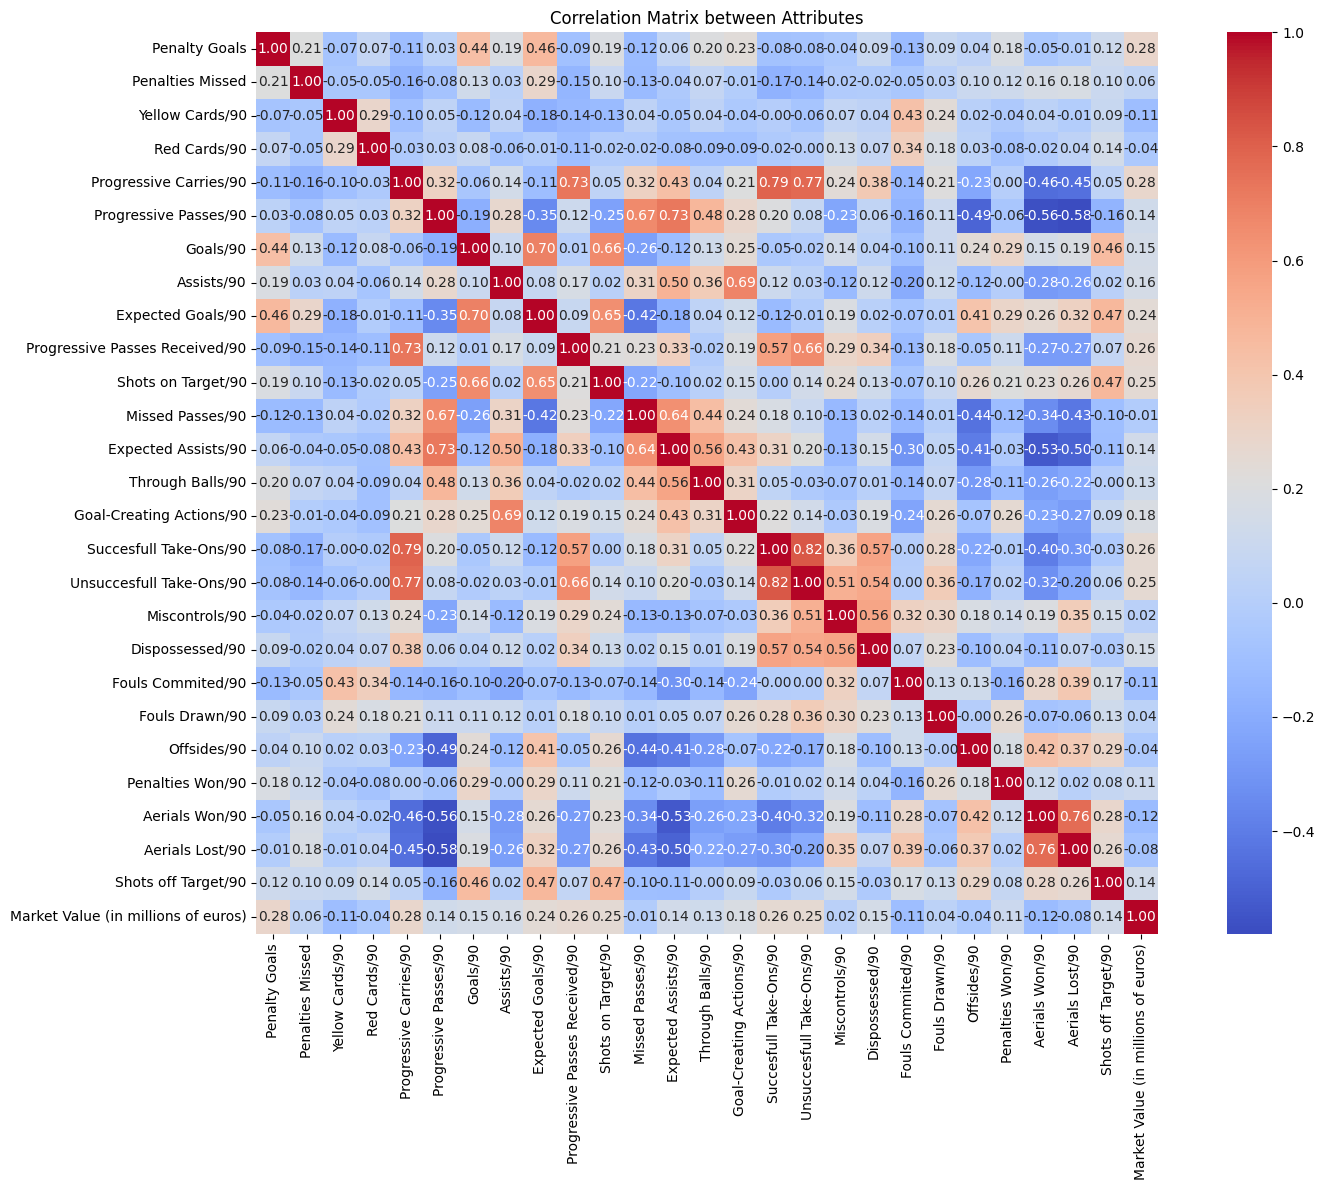

Highly correlated variables (|corr| > 0.70):
Unsuccesfull Take-Ons/90 ↔ Succesfull Take-Ons/90 = 0.82
Succesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.79
Unsuccesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.77
Aerials Lost/90 ↔ Aerials Won/90 = 0.76
Progressive Passes Received/90 ↔ Progressive Carries/90 = 0.73
Expected Assists/90 ↔ Progressive Passes/90 = 0.73


In [18]:
# Generate the correlation matrix
correlation_matrix = df[training_columns].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix between Attributes")
plt.tight_layout()
plt.show()

# Define the high correlation threshold
threshold = 0.7

# Select the upper triangle of the correlation matrix (without the diagonal)
upper = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.abs().shape), k=1).astype(bool))

# List of highly correlated pairs
correlated_pairs = [(col, row, upper.loc[row, col])
                         for col in upper.columns
                         for row in upper.index
                         if upper.loc[row, col] > threshold]

# Exhibit the highly correlated pairs
print("Highly correlated variables (|corr| > {:.2f}):".format(threshold))
for var1, var2, corr in sorted(correlated_pairs, key=lambda x: -x[2]):
    print(f"{var1} ↔ {var2} = {corr:.2f}")

In [19]:
## Feature Engineering

X = X.copy()

# Transform Unsuccesfull Take-Ons and Succesfull Take-Ons into Succesfull Take-Ons Rate
X['Succesfull Take-Ons Rate'] = round(X['Succesfull Take-Ons/90'] / (X['Unsuccesfull Take-Ons/90'] + X['Succesfull Take-Ons/90']), 2)
X.drop(columns=['Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90'], inplace=True)
df['Succesfull Take-Ons Rate'] = X['Succesfull Take-Ons Rate'].copy()
df.drop(columns=['Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90'], inplace=True)

# Transform Aerials Lost and Aerials Won into Aerials Won Rate
X['Aerials Won Rate'] = round(X['Aerials Won/90'] / (X['Aerials Won/90'] + X['Aerials Lost/90']), 2)
X.drop(columns=['Aerials Won/90', 'Aerials Lost/90'], inplace=True)
df['Aerials Won Rate'] = X['Aerials Won Rate'].copy()
df.drop(columns=['Aerials Won/90', 'Aerials Lost/90'], inplace=True)

X.columns

Index(['Penalty Goals', 'Penalties Missed', 'Yellow Cards/90', 'Red Cards/90',
       'Progressive Carries/90', 'Progressive Passes/90', 'Goals/90',
       'Assists/90', 'Expected Goals/90', 'Progressive Passes Received/90',
       'Shots on Target/90', 'Missed Passes/90', 'Expected Assists/90',
       'Through Balls/90', 'Goal-Creating Actions/90', 'Miscontrols/90',
       'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
       'Penalties Won/90', 'Shots off Target/90',
       'Market Value (in millions of euros)', 'Succesfull Take-Ons Rate',
       'Aerials Won Rate'],
      dtype='object')

In [20]:
def evaluate_clustering(X, labels):
    # Mask for points that are not noise
    mask = labels != -1
    n_noise = np.sum(~mask)
    noise_proportion = n_noise / len(labels)

    # If less than 2 clusters, return -1
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return -1, noise_proportion

    # Silhouette (excluding -1)
    sil_score = silhouette_score(X[mask], labels[mask])

    return sil_score, noise_proportion

In [21]:
results = []

# Scale Market Value (highly variable values)
scaler = MinMaxScaler()
X = X.copy()
X['Market Value (in millions of euros)'] = scaler.fit_transform(X[['Market Value (in millions of euros)']])

# DBSCAN
for eps, min_sample in product(
    np.arange(0.5, 3.6, 0.1),
    np.arange(5, 11)
):
    clusterer = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1).fit(X)
    labels = clusterer.labels_

    sil_score, noise = evaluate_clustering(X, labels)

    if sil_score != -1:
        results.append({
            'eps': eps,
            'min_samples': min_sample,
            'silhouette': sil_score,
            'noise': noise
        })

# Create DataFrame with results
df_result = pd.DataFrame(results)

# Filter only models with sil_score != -1
df_valid = df_result[df_result['silhouette'] != -1].copy()

# Normalize with MinMaxScaler
scaler = MinMaxScaler()
df_valid[['silhouette_norm', 'noise_norm']] = scaler.fit_transform(
    df_valid[['silhouette', 'noise']]
)

# Calculate final score
df_valid['score_final'] = (
    0.7 * df_valid['silhouette_norm']
    - 0.3 * df_valid['noise_norm']
)

# Show the scores
print(df_valid[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

# Best model
best = df_valid.loc[df_valid['score_final'].idxmax()]
print("\n🔍 Best model:")
print(best[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

    eps  min_samples  silhouette     noise  score_final
0   1.9            5    0.351701  0.896774     0.118853
1   2.0            5    0.433274  0.825806     0.354994
2   2.0            6    0.455272  0.832258     0.404341
3   2.1            5    0.339727  0.703226     0.198460
4   2.1            6    0.304955  0.754839     0.085831
5   2.1            7    0.312390  0.812903     0.071200
6   2.2            5    0.221660  0.606452    -0.031566
7   2.2            6    0.283952  0.670968     0.082254
8   2.2            7    0.274061  0.722581     0.029526
9   2.2            8    0.307029  0.735484     0.101667
10  2.2            9    0.284785  0.812903     0.004742
11  2.3            5    0.382594  0.483871     0.424551
12  2.3            6    0.261291  0.554839     0.092761
13  2.3            7    0.216098  0.651613    -0.070257
14  2.3            8    0.244505  0.670968    -0.012712
15  2.3            9    0.209808  0.696774    -0.110702
16  2.4            5    0.345544  0.400000     0

In [22]:
# Reexecute DBSCAN with the best parameters
best_eps = best['eps']
best_min_sample = best['min_samples']

# Recalculate labels of the best model
best_clusterer = DBSCAN(eps=best_eps, min_samples=int(best_min_sample), n_jobs=-1).fit(X)
best_labels = best_clusterer.labels_

df['Cluster'] = best_labels

In [23]:
## Visualize clusters and noise (PCA)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame to facilitate use with Plotly
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = best_labels.astype(str)  # To allow -1 (outliers)

# Change cluster name -1 to 'Outlier'
df_plot['Cluster'] = df_plot['Cluster'].replace({'-1': 'Outlier'})

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    symbol='Cluster',
    opacity=0.8,
    title=f"PCA 3D - Forwards (DBSCAN - eps={round(best_eps, 2)}, min_samples={best_min_sample})"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.update_layout(legend=dict(itemsizing='constant'))

fig.show()

In [24]:
## Compare clusters based on performance and market value

# Definition of performance_fw
df['performance_fw'] = (
    df['Goals/90'] * 5 +
    df['Assists/90'] * 4 +
    df['Shots on Target/90'] * 2 +
    df['Goal-Creating Actions/90'] * 3 +
    df['Penalty Goals'] * 2.5 +
    df['Penalties Missed'] * (-2.5) +
    df['Penalties Won/90'] * 2.5 +
    df['Expected Goals/90'] * 2.5 +
    df['Expected Assists/90'] * 2 +
    df['Shots off Target/90'] * 1 +
    df['Missed Passes/90'] * (-1) +
    df['Progressive Carries/90'] * 1 +
    df['Progressive Passes/90'] * 1 +
    df['Progressive Passes Received/90'] * 1 +
    df['Fouls Drawn/90'] * 1 +
    df['Aerials Won Rate'] * 1.5 +
    df['Succesfull Take-Ons Rate'] * 1.5 +
    df['Offsides/90'] * (-1) +
    df['Through Balls/90'] * 1.5 +
    df['Yellow Cards/90'] * (-1) +
    df['Red Cards/90'] * (-3) +
    df['Fouls Commited/90'] * (-1) +
    df['Miscontrols/90'] * (-1) +
    df['Dispossessed/90'] * (-1)
)

# Scale performance_fw and Market Value
scaler = MinMaxScaler()

df[['performance_fw_scaled', 'market_value_scaled']] = scaler.fit_transform(
    df[['performance_fw', 'Market Value (in millions of euros)']]
)

df['cost_benefit'] = df['performance_fw_scaled'] / (df['market_value_scaled'] + 1)  # 1 avoids very large results

df_filtered = df[df['Cluster'] != -1].copy()  # Remove outliers from comparison

# Group and calculate summary statistics
summary = df_filtered.groupby('Cluster').agg(
    performance_fw_mean=('performance_fw_scaled', 'mean'),
    performance_fw_std=('performance_fw_scaled', 'std'),
    market_value_mean=('market_value_scaled', 'mean'),
    market_value_std=('market_value_scaled', 'std'),
    n_players=('Player', 'count')
)

# Calculate cost-benefit ratio
summary['cost_benefit'] = (
    summary['performance_fw_mean'] /
    (
        summary['market_value_mean'] *
        (1 + summary['performance_fw_std']) *
        (1 + summary['market_value_std'])
    )
)

# Reorganize columns
summary = summary[[
    'performance_fw_mean',
    'performance_fw_std',
    'market_value_mean',
    'n_players',
    'cost_benefit'
]]

summary = summary.sort_values(by='cost_benefit', ascending=False)

print(summary)

         performance_fw_mean  performance_fw_std  market_value_mean  \
Cluster                                                               
0                   0.299820            0.122520            0.05754   
1                   0.282398            0.065978            0.06376   

         n_players  cost_benefit  
Cluster                           
0               60      4.293685  
1               13      3.995910  


In [25]:
## Find outliers closest to the ideal cluster

cluster_id_good = summary['cost_benefit'].idxmax()

# Separate vectors of the ideal cluster and outliers
idx_cluster = np.where(best_labels == cluster_id_good)[0]
idx_outliers = np.where(best_labels == -1)[0]

X_cluster = X.iloc[idx_cluster]
X_outliers = X.iloc[idx_outliers]

# Calculate centroid of the good cluster
centroid_cluster = X_cluster.mean(axis=0)

# Calculate distance of outliers to the ideal cluster
distances = [distance.euclidean(centroid_cluster, x) for x in X_outliers.values]

# Top N outliers closest to the ideal cluster
top_n = 20
index_top_outliers = np.argsort(distances)[:top_n]

# Show the players
df_outliers = df.iloc[idx_outliers].copy()
df_outliers['Distance'] = distances
outliers_closest = df_outliers.iloc[index_top_outliers]

print(outliers_closest[['Player', 'performance_fw', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance']])

                   Player  performance_fw  \
24                Luciano          11.955   
87              Janderson           1.380   
43      Alexander Aravena          13.385   
133            Igor Jesus          13.140   
51        Tiquinho Soares           9.955   
142          Isidro Pitta          10.615   
143                 Adson          11.820   
5           Pablo Vegetti          -0.610   
105       Miguel Monsalve           9.695   
119        Henry Mosquera           8.860   
15               Thaciano           7.920   
32   Cauly Oliveira Souza           6.865   
109            Kauã Elias           5.085   
103         Lucas Barbosa           4.885   
69           Yuri Alberto          20.535   
83                Clayson           4.510   
112                Wesley          11.590   
84             Jhon Arias           6.620   
147    Jan Carlos Hurtado           1.570   
106                 Nikão          11.170   

     Market Value (in millions of euros)  cost_benefit

In [26]:
## Verify cost-benefit of the players with the best cost-benefit

# Create a table with Player, cost_benefit and Cluster
cost_benefit_table = df[['Player', 'cost_benefit', 'Cluster']].copy()

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the top 50 rows
print(cost_benefit_table.head(50))

                Player  cost_benefit  Cluster
0       Eduardo Vargas      0.781232       -1
1              Michael      0.649220       -1
2                 Hulk      0.639921       -1
3                 Biel      0.607784       -1
4        Ademir Santos      0.569853       -1
5      Gabriel Barbosa      0.568320       -1
6              Memphis      0.566914        0
7          Lucas Moura      0.563746       -1
8    Luciano Rodríguez      0.557995        0
9     Gustavo Mosquito      0.554463        0
10       Renato Kayser      0.549222       -1
11        Alan Patrick      0.548599       -1
12          Alerrandro      0.540866       -1
13               Erick      0.539422       -1
14            Ferreira      0.501917       -1
15               Pedro      0.501420       -1
16     Estêvão Willian      0.500000       -1
17        Yuri Alberto      0.488351       -1
18             Julimar      0.483316       -1
19      Bruno Henrique      0.476946        0
20              Lázaro      0.4768

In [27]:
## Hybrid score to define good and cheap outliers according to original cost-benefit
## and proximity to the good and cheap cluster

# Scale Distance
scaler = MinMaxScaler()
df_outliers['distance_scaled'] = scaler.fit_transform(df_outliers[['Distance']])

# Calculate the hybrid score
df_outliers['score'] = df_outliers['cost_benefit'] / (df_outliers['distance_scaled'] + 1)  # 1 avoids very large results

# Display the top 20 outliers with the highest score
top_50_outliers = df_outliers.sort_values(by='score', ascending=False).head(50)

# Display
print(top_50_outliers[['Player', 'Squad', 'performance_fw', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance', 'score']])

                   Player               Squad  performance_fw  \
118        Eduardo Vargas    Atlético Mineiro          24.720   
37                   Hulk    Atlético Mineiro          20.100   
77        Gabriel Barbosa            Flamengo          18.650   
23                   Biel               Bahia          20.195   
126         Renato Kayser  Criciúma/Fortaleza          16.575   
33            Lucas Moura           São Paulo          17.960   
39             Alerrandro             Vitória          17.085   
69           Yuri Alberto         Corinthians          20.535   
43      Alexander Aravena              Grêmio          13.385   
24                Luciano           São Paulo          11.955   
85                 Lázaro           Palmeiras          14.205   
21                  Pedro            Flamengo          20.575   
46      Vinicius Mendonça       RB Bragantino          14.365   
68                Julimar      Ath Paranaense          14.300   
143                 Adson

In [28]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest()
y_pred_if = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_IF'] = y_pred_if

# Count outliers
n_outliers = (y_pred_if == -1).sum()
n_normals = (y_pred_if == 1).sum()
outlier_rate = n_outliers / len(y_pred_if)

# Display results
print(f"[IForest] Total outliers detected: {n_outliers}")
print(f"[IForest] Outlier rate: {outlier_rate:.2%}")

[IForest] Total outliers detected: 10
[IForest] Outlier rate: 6.45%


In [29]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_IF'] = pd.Series(y_pred_if).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_IF',
    symbol='Outlier_IF',
    opacity=0.7,
    title="Outliers - Forwards (Isolation Forest) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [30]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by Isolation Forest (Anomaly == -1)
outliers = df[df['Outlier_IF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_fw', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_IF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

            Player               Squad  performance_fw  \
0   Eduardo Vargas    Atlético Mineiro          24.720   
1          Michael            Flamengo          21.425   
2             Hulk    Atlético Mineiro          20.100   
3    Renato Kayser  Criciúma/Fortaleza          16.575   
4     Alan Patrick       Internacional          17.215   
5            Pedro            Flamengo          20.575   
6  Estêvão Willian           Palmeiras          32.590   
7     Óscar Romero       Botafogo (RJ)          10.745   
8    Thiago Almada       Botafogo (RJ)          12.850   
9    Rodrigo Garro         Corinthians           8.790   

   Market Value (in millions of euros)  cost_benefit  Outlier_IF  
0                                  0.2      0.781232          -1  
1                                  4.0      0.649220          -1  
2                                  1.5      0.639921          -1  
3                                  1.0      0.549222          -1  
4                         

In [31]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.05)
y_pred_lof = lof.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_LOF'] = y_pred_lof

# Count outliers
n_outliers = (y_pred_lof == -1).sum()
outlier_rate = n_outliers / len(y_pred_lof)

# Display results
print(f"[LOF] Total outliers detected: {n_outliers}")
print(f"[LOF] Outlier rate: {outlier_rate:.2%}")

[LOF] Total outliers detected: 8
[LOF] Outlier rate: 5.16%


In [32]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_LOF'] = pd.Series(y_pred_lof).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_LOF',
    symbol='Outlier_LOF',
    opacity=0.7,
    title="Outliers - Forwards (Local Outlier Factor (LOF)) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [33]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by LOF (Anomaly == -1)
outliers = df[df['Outlier_LOF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_fw', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_LOF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

              Player             Squad  performance_fw  \
0            Michael          Flamengo          21.425   
1               Hulk  Atlético Mineiro          20.100   
2         Alerrandro           Vitória          17.085   
3              Pedro          Flamengo          20.575   
4    Estêvão Willian         Palmeiras          32.590   
5  Matheus Gonçalves          Flamengo          10.340   
6      Rodrigo Garro       Corinthians           8.790   
7       John Kennedy        Fluminense           5.235   

   Market Value (in millions of euros)  cost_benefit  Outlier_LOF  
0                                  4.0      0.649220           -1  
1                                  1.5      0.639921           -1  
2                                  3.5      0.540866           -1  
3                                 20.0      0.501420           -1  
4                                 60.0      0.500000           -1  
5                                  7.0      0.345402           -1  
6

In [34]:
# One-Class SVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu is the proportion of outliers
y_pred_ocsvm = ocsvm.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_OCSVM'] = y_pred_ocsvm

# Count outliers
n_outliers = (y_pred_ocsvm == -1).sum()
outlier_rate = n_outliers / len(y_pred_ocsvm)

# Display results
print(f"[One-Class SVM] Total outliers detected: {n_outliers}")
print(f"[One-Class SVM] Outlier rate: {outlier_rate:.2%}")

[One-Class SVM] Total outliers detected: 7
[One-Class SVM] Outlier rate: 4.52%


In [35]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_OCSVM'] = pd.Series(y_pred_ocsvm).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_OCSVM',
    symbol='Outlier_OCSVM',
    opacity=0.7,
    title="Outliers - Forwards (One-Class SVM) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()

In [36]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by One-Class SVM (Anomaly == -1)
outliers = df[df['Outlier_OCSVM'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_fw', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_OCSVM']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

            Player                       Squad  performance_fw  \
0          Michael                    Flamengo          21.425   
1            Pedro                    Flamengo          20.575   
2  Estêvão Willian                   Palmeiras          32.590   
3    Rodrigo Garro                 Corinthians           8.790   
4      Germán Cano                  Fluminense           2.815   
5     Alex Santana  Ath Paranaense/Corinthians           2.465   
6     Lucas Alario               Internacional          -3.600   

   Market Value (in millions of euros)  cost_benefit  Outlier_OCSVM  
0                                  4.0      0.649220             -1  
1                                 20.0      0.501420             -1  
2                                 60.0      0.500000             -1  
3                                 13.0      0.281694             -1  
4                                  0.7      0.175501             -1  
5                                  1.2      0.16456

In [37]:
# FW with Clusters and Anomalies
df
df.to_excel("output_data/fw_clusters.xlsx", index=False)

### MODELING (MIDFIELDERS)

In [38]:
# Load the sheet of midfielders
df = pd.read_excel("output_data/data_players_br_2024.xlsx", sheet_name="MF")
df.columns

Index(['Player ID', 'Player', 'Nation', 'Position', 'Age at season start',
       'Year of birth', 'Squad', 'Minutes Played', 'Minutes Played/90',
       'Completed Matches', 'Penalty Goals', 'Penalties Missed',
       'Yellow Cards/90', 'Red Cards/90', 'Progressive Carries/90',
       'Progressive Passes/90', 'Goals/90', 'Assists/90', 'Expected Goals/90',
       'Progressive Passes Received/90', 'Shots on Target/90',
       'Missed Passes/90', 'Expected Assists/90', 'Through Balls/90',
       'Goal-Creating Actions/90', 'Tackles/90', 'Challenges Lost/90',
       'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Errors/90',
       'Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90', 'Miscontrols/90',
       'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
       'Penalties Won/90', 'Penalties Conceded/90', 'Own Goals/90',
       'Ball Recoveries/90', 'Aerials Won/90', 'Aerials Lost/90',
       'Shots off Target/90', 'Market Value (in millions of euros)'],
    

In [39]:
# Remove unnecessary variables to form clusters of midfielders
unused_columns_mf = ['Offsides/90', 'Aerials Won/90', 'Aerials Lost/90']

df.drop(columns=unused_columns_mf, inplace=True)

# Remove unwanted columns for training
unused_columns = [
    "Player ID", "Player", "Nation", "Position", "Age at season start",
    "Year of birth", "Squad", "Minutes Played", "Minutes Played/90", "Completed Matches"
]

# Select desired columns for training
training_columns = [col for col in df.columns if col not in unused_columns]

X = df[training_columns]

X

,Penalty Goals,Penalties Missed,Yellow Cards/90,Red Cards/90,Progressive Carries/90,Progressive Passes/90,Goals/90,Assists/90,Expected Goals/90,Progressive Passes Received/90,...,Miscontrols/90,Dispossessed/90,Fouls Commited/90,Fouls Drawn/90,Penalties Won/90,Penalties Conceded/90,Own Goals/90,Ball Recoveries/90,Shots off Target/90,Market Value (in millions of euros)
0,4,1,0.15,0.00,1.83,6.45,0.41,0.15,0.35,5.28,...,1.83,2.44,1.12,1.57,0.00,0.00,0.0,4.47,1.11,3.0
1,1,0,0.17,0.00,2.88,4.79,0.08,0.08,0.10,6.29,...,1.88,0.71,0.62,1.25,0.00,0.00,0.0,4.00,1.13,0.6
2,0,0,0.59,0.08,2.10,6.13,0.08,0.00,0.18,5.88,...,1.85,1.34,2.44,2.27,0.00,0.00,0.0,4.37,1.86,7.0
3,0,0,0.31,0.00,0.70,4.14,0.23,0.08,0.10,1.02,...,1.25,1.09,1.48,1.33,0.08,0.00,0.0,5.47,0.62,2.5
4,0,0,0.47,0.03,0.66,5.76,0.03,0.16,0.05,2.59,...,1.14,0.95,1.36,2.03,0.03,0.03,0.0,6.65,0.51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,1,0.16,0.00,3.11,4.86,0.27,0.33,0.17,6.39,...,2.40,0.93,1.04,1.09,0.05,0.05,0.0,4.04,1.37,4.0
191,0,0,0.26,0.00,0.86,4.48,0.17,0.00,0.11,1.12,...,1.21,1.81,1.47,1.12,0.00,0.00,0.0,6.29,0.95,0.9
192,0,0,0.36,0.00,1.98,4.14,0.00,0.00,0.05,4.95,...,1.80,2.52,0.63,1.17,0.00,0.00,0.0,5.23,1.08,0.2
193,0,0,0.22,0.00,0.50,4.75,0.07,0.00,0.05,0.72,...,0.79,0.58,1.29,1.51,0.00,0.00,0.0,4.03,0.50,2.0


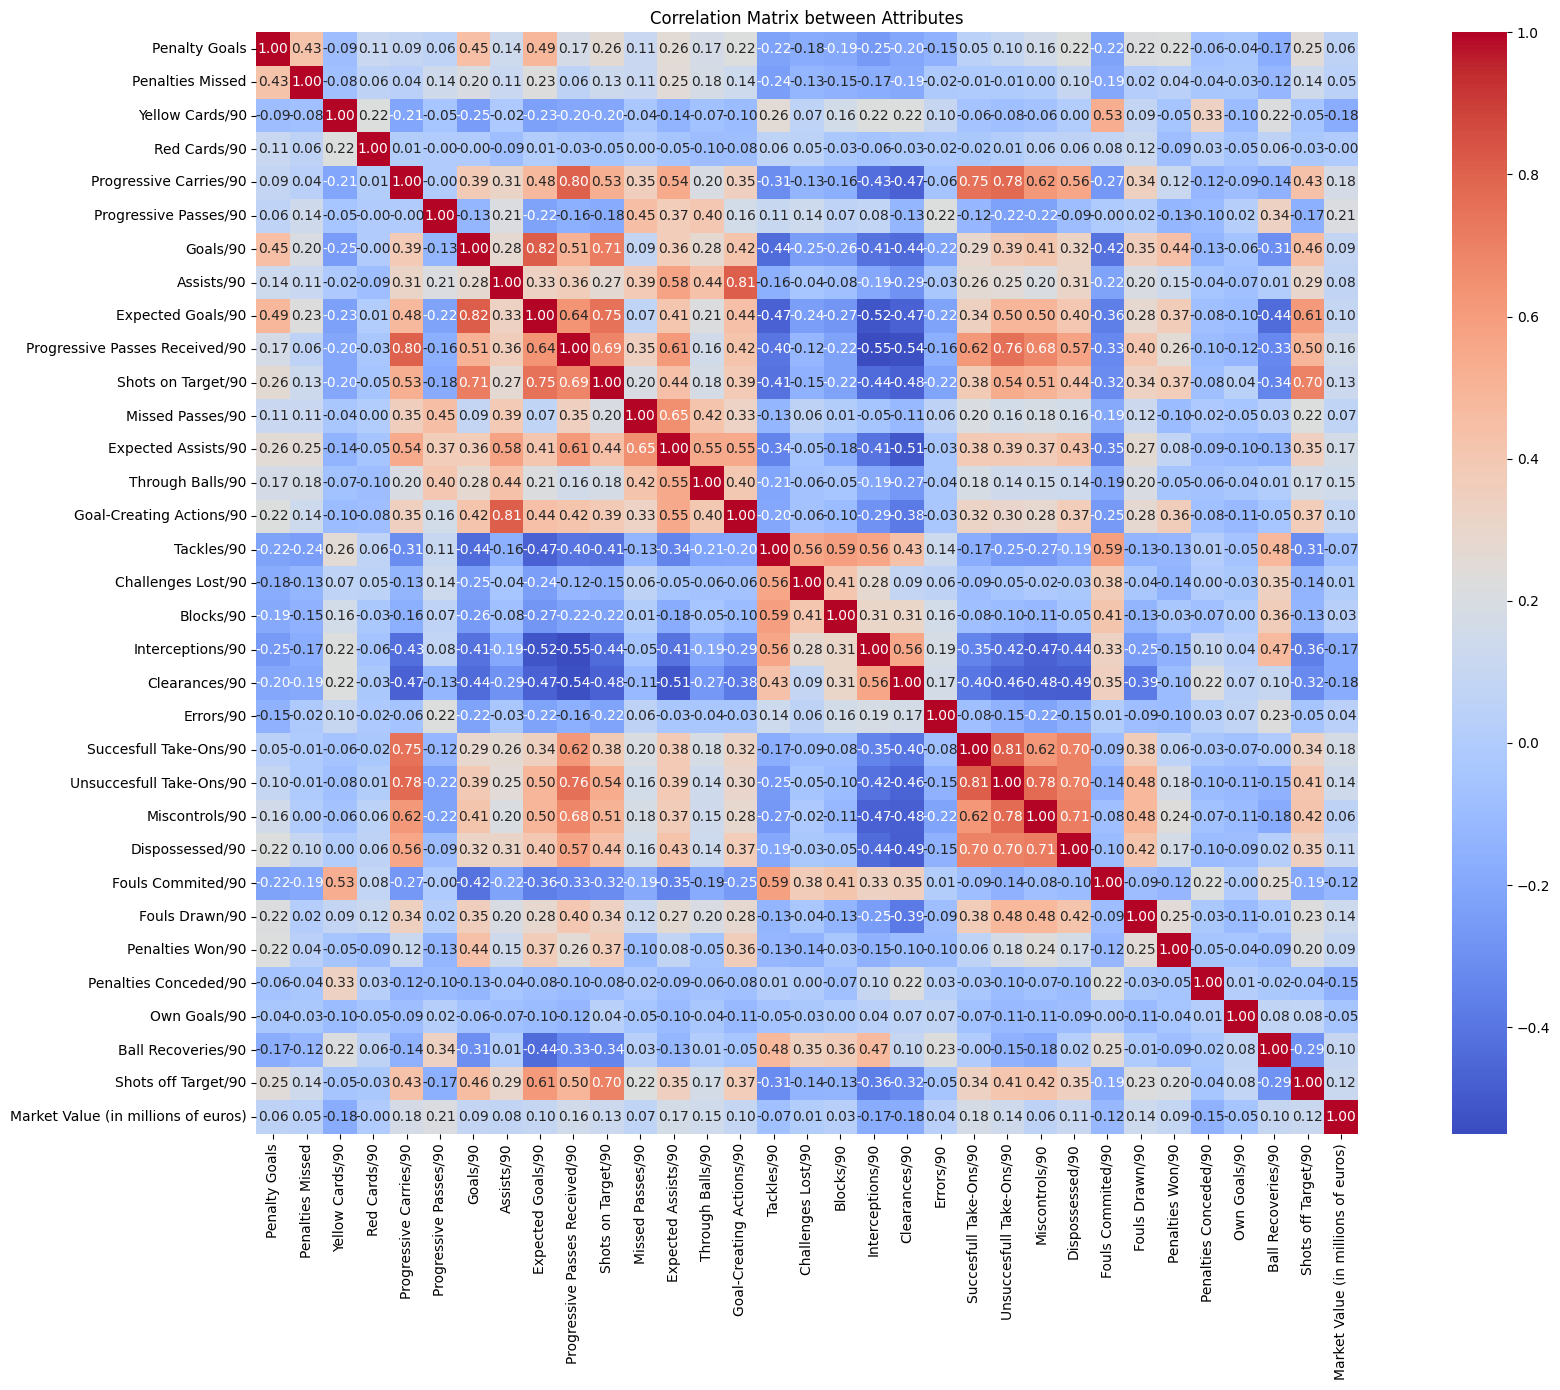

Highly correlated variables (|corr| > 0.70):
Expected Goals/90 ↔ Goals/90 = 0.82
Goal-Creating Actions/90 ↔ Assists/90 = 0.81
Unsuccesfull Take-Ons/90 ↔ Succesfull Take-Ons/90 = 0.81
Progressive Passes Received/90 ↔ Progressive Carries/90 = 0.80
Unsuccesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.78
Miscontrols/90 ↔ Unsuccesfull Take-Ons/90 = 0.78
Unsuccesfull Take-Ons/90 ↔ Progressive Passes Received/90 = 0.76
Shots on Target/90 ↔ Expected Goals/90 = 0.75
Succesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.75
Dispossessed/90 ↔ Miscontrols/90 = 0.71
Shots on Target/90 ↔ Goals/90 = 0.71


In [40]:
# Generate the correlation matrix
correlation_matrix = df[training_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix between Attributes")
plt.tight_layout()
plt.show()

# Define the high correlation threshold
threshold = 0.7

# Select the upper triangle of the matrix (upper triangle without diagonal)
upper = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.abs().shape), k=1).astype(bool))

# List pairs with correlation above the threshold
highly_correlated_pairs = [(col, row, upper.loc[row, col])
                           for col in upper.columns
                           for row in upper.index
                           if upper.loc[row, col] > threshold]

# Display the pairs
print("Highly correlated variables (|corr| > {:.2f}):".format(threshold))
for var1, var2, corr in sorted(highly_correlated_pairs, key=lambda x: -x[2]):
    print(f"{var1} ↔ {var2} = {corr:.2f}")

In [41]:
## Feature Engineering

X = X.copy()

# Transform Unsuccesfull Take-Ons and Succesfull Take-Ons into Succesfull Take-Ons Rate
X['Succesfull Take-Ons Rate'] = round(X['Succesfull Take-Ons/90'] / (X['Unsuccesfull Take-Ons/90'] + X['Succesfull Take-Ons/90']), 2)
X.drop(columns=['Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90'], inplace=True)
df['Succesfull Take-Ons Rate'] = X['Succesfull Take-Ons Rate'].copy()
df.drop(columns=['Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90'], inplace=True)

# Transform Shots on Target and Shots off Target into Shots on Target Rate
X['Shots on Target Rate'] = round(X['Shots on Target/90'] / (X['Shots on Target/90'] + X['Shots off Target/90']), 2)
X.drop(columns=['Shots on Target/90', 'Shots off Target/90'], inplace=True)
df['Shots on Target Rate'] = X['Shots on Target Rate'].copy()
df.drop(columns=['Shots on Target/90', 'Shots off Target/90'], inplace=True)

X.columns

Index(['Penalty Goals', 'Penalties Missed', 'Yellow Cards/90', 'Red Cards/90',
       'Progressive Carries/90', 'Progressive Passes/90', 'Goals/90',
       'Assists/90', 'Expected Goals/90', 'Progressive Passes Received/90',
       'Missed Passes/90', 'Expected Assists/90', 'Through Balls/90',
       'Goal-Creating Actions/90', 'Tackles/90', 'Challenges Lost/90',
       'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Errors/90',
       'Miscontrols/90', 'Dispossessed/90', 'Fouls Commited/90',
       'Fouls Drawn/90', 'Penalties Won/90', 'Penalties Conceded/90',
       'Own Goals/90', 'Ball Recoveries/90',
       'Market Value (in millions of euros)', 'Succesfull Take-Ons Rate',
       'Shots on Target Rate'],
      dtype='object')

In [42]:
def evaluate_clustering(X, labels):
    # Mask for points that are not noise
    mask = labels != -1
    n_noise = np.sum(~mask)
    noise_proportion = n_noise / len(labels)

    # If there are less than 2 valid clusters, return a bad score
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return -1, noise_proportion

    # Silhouette (without counting -1)
    sil_score = silhouette_score(X[mask], labels[mask])

    return sil_score, noise_proportion

In [43]:
results = []

# Scale Market Value (highly variable values)
scaler = MinMaxScaler()
X = X.copy()
X['Market Value (in millions of euros)'] = scaler.fit_transform(X[['Market Value (in millions of euros)']])

# DBSCAN
for eps, min_sample in product(
    np.arange(0.5, 3.6, 0.1),
    np.arange(5, 11)
):
    clusterer = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1).fit(X)
    labels = clusterer.labels_

    sil_score, noise = evaluate_clustering(X, labels)

    if sil_score != -1:
        results.append({
            'eps': eps,
            'min_samples': min_sample,
            'silhouette': sil_score,
            'noise': noise
        })

# Create DataFrame with results
df_results = pd.DataFrame(results)

# Filter only models with sil_score != -1
df_valid = df_results[df_results['silhouette'] != -1].copy()

# Normalize with MinMaxScaler
scaler = MinMaxScaler()
df_valid[['silhouette_norm', 'noise_norm']] = scaler.fit_transform(
    df_valid[['silhouette', 'noise']]
)

# Calculate final score
df_valid['score_final'] = (
    0.7 * df_valid['silhouette_norm']
    - 0.3 * df_valid['noise_norm']
)

# Show the scores
print(df_valid[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

# Best model
best = df_valid.loc[df_valid['score_final'].idxmax()]
print("\n🔍 Best model:")
print(best[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

    eps  min_samples  silhouette     noise  score_final
0   1.8            5    0.233410  0.943590    -0.118110
1   2.1            5    0.128539  0.800000    -0.228814
2   2.2            5    0.311623  0.671795     0.152289
3   2.2            6    0.282110  0.728205     0.073136
4   2.3            5    0.336937  0.625641     0.219076
5   2.3            6    0.316919  0.661538     0.166561
6   2.4            5    0.456409  0.574359     0.451715
7   2.4            6    0.451704  0.615385     0.423216
8   2.4            7    0.485011  0.635897     0.470814
9   2.4            8    0.532133  0.671795     0.534746
10  2.5            5    0.435389  0.507692     0.448308
11  2.5            6    0.423702  0.533333     0.415325
12  2.5            7    0.418311  0.584615     0.380552
13  2.5            8    0.418311  0.584615     0.380552
14  2.6            5    0.414329  0.461538     0.434663
15  2.6            6    0.400110  0.492308     0.394746
16  2.6            8    0.439237  0.548718     0

In [44]:
# Reexecute DBSCAN with the best parameters
best_eps = best['eps']
best_min_sample = best['min_samples']

# Recalculate labels of the best model
best_clusterer = DBSCAN(eps=best_eps, min_samples=int(best_min_sample), n_jobs=-1).fit(X)
best_labels = best_clusterer.labels_

df['Cluster'] = best_labels

In [45]:
## Visualize clusters and noises (PCA)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame to facilitate use with Plotly
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = best_labels.astype(str)  # To allow -1 (outliers)

# Change cluster name -1 to 'Outlier'
df_plot['Cluster'] = df_plot['Cluster'].replace({'-1': 'Outlier'})

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    symbol='Cluster',
    opacity=0.8,
    title=f"PCA 3D - Midfielders (DBSCAN - eps={round(best_eps, 2)}, min_samples={best_min_sample})"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.update_layout(legend=dict(itemsizing='constant'))

fig.show()

In [46]:
# Definition of performance_mf
df['performance_mf'] = (
    df['Goals/90'] * 3 +
    df['Assists/90'] * 3 +
    df['Shots on Target Rate'] * 1 +
    df['Goal-Creating Actions/90'] * 2 +
    df['Penalty Goals'] * 1.5 +
    df['Penalties Missed'] * (-2.5) +
    df['Penalties Won/90'] * 2 +
    df['Expected Goals/90'] * 1.5 +
    df['Expected Assists/90'] * 2 +
    df['Missed Passes/90'] * (-1) +
    df['Progressive Carries/90'] * 1.5 +
    df['Progressive Passes/90'] * 1.5 +
    df['Progressive Passes Received/90'] * 1 +
    df['Fouls Drawn/90'] * 1 +
    df['Succesfull Take-Ons Rate'] * 1.5 +
    df['Through Balls/90'] * 1.5 +
    df['Yellow Cards/90'] * (-1) +
    df['Red Cards/90'] * (-3) +
    df['Fouls Commited/90'] * (-1) +
    df['Tackles/90'] * 1.5 +
    df['Challenges Lost/90'] * (-1.5) +
    df['Blocks/90'] * 1.5 +
    df['Interceptions/90'] * 1.5 +
    df['Clearances/90'] * 0.5 +
    df['Miscontrols/90'] * (-1) +
    df['Dispossessed/90'] * (-1.5) +
    df['Errors/90'] * (-2) +
    df['Own Goals/90'] * (-3) +
    df['Ball Recoveries/90'] * 1.5 +
    df['Penalties Conceded/90'] * (-2.5)
)

# Scale performance_mf and Market Value
scaler = MinMaxScaler()

df[['performance_mf_scaled', 'market_value_scaled']] = scaler.fit_transform(
    df[['performance_mf', 'Market Value (in millions of euros)']]
)

df['cost_benefit'] = df['performance_mf_scaled'] / (df['market_value_scaled'] + 1)  # 1 avoids very large results

df_filtered = df[df['Cluster'] != -1].copy()  # Remove outliers from comparison

# Group and calculate summary statistics
summary = df_filtered.groupby('Cluster').agg(
    performance_mf_mean=('performance_mf_scaled', 'mean'),
    performance_mf_std=('performance_mf_scaled', 'std'),
    market_value_mean=('market_value_scaled', 'mean'),
    market_value_std=('market_value_scaled', 'std'),
    n_players=('Player', 'count')
)

# Calculate cost-benefit ratio
summary['cost_benefit'] = (
    summary['performance_mf_mean'] /
    (
        summary['market_value_mean'] *
        (1 + summary['performance_mf_std']) *
        (1 + summary['market_value_std'])
    )
)

# Reorganize columns
summary = summary[[
    'performance_mf_mean',
    'performance_mf_std',
    'market_value_mean',
    'n_players',
    'cost_benefit'
]]

summary = summary.sort_values(by='cost_benefit', ascending=False)

print(summary)

         performance_mf_mean  performance_mf_std  market_value_mean  \
Cluster                                                               
0                   0.550173            0.118338           0.096134   
1                   0.627827            0.088804           0.141801   

         n_players  cost_benefit  
Cluster                           
0               56      4.626333  
1                8      3.487915  


In [47]:
## Find outliers closest to the ideal cluster

cluster_id_good = summary['cost_benefit'].idxmax()

# Separate vectors of the ideal cluster and outliers
idx_cluster = np.where(best_labels == cluster_id_good)[0]
idx_outliers = np.where(best_labels == -1)[0]

X_cluster = X.iloc[idx_cluster]
X_outliers = X.iloc[idx_outliers]

# Calculate centroid of the good cluster
centroid_cluster = X_cluster.mean(axis=0)

# Calculate distance of outliers to the ideal cluster
distances = [distance.euclidean(centroid_cluster, x) for x in X_outliers.values]

# Top N outliers closest to the ideal cluster
top_n = 20
index_top_outliers = np.argsort(distances)[:top_n]

# Show the players
df_outliers = df.iloc[idx_outliers].copy()
df_outliers['Distance'] = distances
outliers_closest = df_outliers.iloc[index_top_outliers]

print(outliers_closest[['Player', 'performance_mf', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance']])

                Player  performance_mf  Market Value (in millions of euros)  \
11              Newton          10.460                                  1.0   
47        Eric Ramires          13.380                                  4.5   
121     Ramiro Benetti           8.490                                  0.6   
155        Alan Franco          11.230                                  4.0   
141         Alexsander          13.255                                  5.0   
191      Higor Meritão          17.165                                  0.9   
80           Zé Rafael          16.140                                  3.0   
118             Jadsom          11.815                                  3.5   
72        Pedro Borges          17.345                                  1.5   
178            Gabriel          22.435                                  1.5   
138           Rhaldney          20.570                                  1.0   
185  Matheus Fernandes          21.895              

In [48]:
## Verify cost-benefit of players with the best cost-benefit

# Create a table with Player, cost_benefit and Cluster
cost_benefit_table = df[['Player', 'cost_benefit', 'Cluster']].copy()

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the top 50 rows
print(cost_benefit_table.head(50))

                       Player  cost_benefit  Cluster
0              Eduardo Vargas      0.974066       -1
1             Everton Ribeiro      0.928890       -1
2               Ademir Santos      0.902952       -1
3                       Erick      0.887592       -1
4            Brahian Palacios      0.850585       -1
5                 Lucas Moura      0.793333       -1
6                    Ferreira      0.779330       -1
7                     Gabriel      0.772281       -1
8                        Biel      0.766671       -1
9                      Jadson      0.766104        0
10            João Pedro Pepê      0.763012        0
11             André Carrillo      0.762453       -1
12                    Julimar      0.761840       -1
13               Óscar Romero      0.757854       -1
14          Matheus Fernandes      0.742000       -1
15                     Allano      0.740792       -1
16                    Michael      0.733963       -1
17           Gustavo Mosquito      0.733618   

In [49]:
## Hybrid score to define good and cheap outliers according to original cost-benefit
## and proximity to the good and cheap cluster

# Scale Distance
scaler = MinMaxScaler()
df_outliers['distance_scaled'] = scaler.fit_transform(df_outliers[['Distance']])

# Calculate the hybrid score
df_outliers['score'] = df_outliers['cost_benefit'] / (df_outliers['distance_scaled'] + 1)  # 1 avoids very large results

# Display the top 20 outliers with the highest score
top_50_outliers = df_outliers.sort_values(by='score', ascending=False).head(50)

# Display
print(top_50_outliers[['Player', 'Squad', 'performance_mf', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance', 'score']])

                 Player                    Squad  performance_mf  \
178             Gabriel           Ath Paranaense          22.435   
185   Matheus Fernandes            RB Bragantino          21.895   
147      Eduardo Vargas         Atlético Mineiro          27.295   
138            Rhaldney           Atl Goianiense          20.570   
93       André Carrillo              Corinthians          21.735   
166    Matheus Rossetto                Fortaleza          20.205   
42          Lucas Sasha                Fortaleza          19.620   
82      Everton Ribeiro                    Bahia          27.235   
56              Gregore            Botafogo (RJ)          23.450   
191       Higor Meritão                 Criciúma          17.165   
159              Ronald                 Criciúma          18.585   
72         Pedro Borges                Fortaleza          17.345   
41          Lucas Moura                São Paulo          24.740   
157    Gustavo Mosquito      Vitória/Corinthians

In [50]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest()
y_pred_if = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_IF'] = y_pred_if

# Count outliers
n_outliers = (y_pred_if == -1).sum()
n_normals = (y_pred_if == 1).sum()
outlier_rate = n_outliers / len(y_pred_if)

# Display results
print(f"[IForest] Total outliers detected: {n_outliers}")
print(f"[IForest] Outlier rate: {outlier_rate:.2%}")

[IForest] Total outliers detected: 12
[IForest] Outlier rate: 6.15%


In [51]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_IF'] = pd.Series(y_pred_if).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_IF',
    symbol='Outlier_IF',
    opacity=0.7,
    title="Outliers - Midfielders (Isolation Forest) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [52]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by Isolation Forest (Anomaly == -1)
outliers = df[df['Outlier_IF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_mf', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_IF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

             Player                    Squad  performance_mf  \
0    Eduardo Vargas         Atlético Mineiro          27.295   
1             Erick                São Paulo          25.505   
2            Allano                 Criciúma          20.540   
3           Michael                 Flamengo          23.180   
4   Jhonatan Jowjow  Palmeiras/RB Bragantino          26.090   
5      Alan Patrick            Internacional          20.455   
6    Carlos de Pena                    Bahia          17.920   
7   Gabriel Barbosa                 Flamengo          17.160   
8              Hulk         Atlético Mineiro          15.030   
9    Carlos Alcaraz                 Flamengo          19.345   
10    Thiago Almada            Botafogo (RJ)          23.060   
11     Lucas Alario            Internacional          -1.235   

    Market Value (in millions of euros)  cost_benefit  Outlier_IF  
0                                   0.2      0.974066          -1  
1                              

In [53]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.05)
y_pred_lof = lof.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_LOF'] = y_pred_lof

# Count outliers
n_outliers = (y_pred_lof == -1).sum()
outlier_rate = n_outliers / len(y_pred_lof)

# Display results
print(f"[LOF] Total outliers detected: {n_outliers}")
print(f"[LOF] Outlier rate: {outlier_rate:.2%}")

[LOF] Total outliers detected: 10
[LOF] Outlier rate: 5.13%


In [54]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_LOF'] = pd.Series(y_pred_lof).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_LOF',
    symbol='Outlier_LOF',
    opacity=0.7,
    title="Outliers - Midfielders (Local Outlier Factor (LOF)) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [55]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by LOF (Anomaly == -1)
outliers = df[df['Outlier_LOF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_mf', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_LOF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

            Player             Squad  performance_mf  \
0  Everton Ribeiro             Bahia          27.235   
1   André Carrillo       Corinthians          21.735   
2          Michael          Flamengo          23.180   
3          Gregore     Botafogo (RJ)          23.450   
4   Marlon Freitas     Botafogo (RJ)          23.200   
5   Carlos de Pena             Bahia          17.920   
6        Felipinho    Ath Paranaense          16.235   
7             Hulk  Atlético Mineiro          15.030   
8     John Kennedy        Fluminense           6.665   
9     Lucas Alario     Internacional          -1.235   

   Market Value (in millions of euros)  cost_benefit  Outlier_LOF  
0                                  1.5      0.928890           -1  
1                                  1.0      0.762453           -1  
2                                  4.0      0.733963           -1  
3                                  5.0      0.719455           -1  
4                                  6.0     

In [56]:
# One-Class SVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu is the proportion of outliers
y_pred_ocsvm = ocsvm.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_OCSVM'] = y_pred_ocsvm

# Count outliers
n_outliers = (y_pred_ocsvm == -1).sum()
outlier_rate = n_outliers / len(y_pred_ocsvm)

# Display results
print(f"[One-Class SVM] Total outliers detected: {n_outliers}")
print(f"[One-Class SVM] Outlier rate: {outlier_rate:.2%}")

[One-Class SVM] Total outliers detected: 12
[One-Class SVM] Outlier rate: 6.15%


In [57]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_OCSVM'] = pd.Series(y_pred_ocsvm).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_OCSVM',
    symbol='Outlier_OCSVM',
    opacity=0.7,
    title="Outliers - Midfielders (One-Class SVM) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()

In [58]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by One-Class SVM (Anomaly == -1)
outliers = df[df['Outlier_OCSVM'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_mf', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_OCSVM']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

               Player             Squad  performance_mf  \
0             Michael          Flamengo          23.180   
1             Gregore     Botafogo (RJ)          23.450   
2      Marlon Freitas     Botafogo (RJ)          23.200   
3   Matheus Gonçalves          Flamengo          22.000   
4      Carlos de Pena             Bahia          17.920   
5           Felipinho    Ath Paranaense          16.235   
6     Gabriel Barbosa          Flamengo          17.160   
7               André        Fluminense          23.120   
8       Rodrigo Garro       Corinthians          16.325   
9   Rodrigo Battaglia  Atlético Mineiro           9.620   
10               Nenê         Juventude           5.420   
11       John Kennedy        Fluminense           6.665   

    Market Value (in millions of euros)  cost_benefit  Outlier_OCSVM  
0                                  4.00      0.733963             -1  
1                                  5.00      0.719455             -1  
2                  

In [59]:
# MF with Clusters and Anomalies
df
df.to_excel("output_data/mf_clusters.xlsx", index=False)

### MODELING (DEFENDERS)

In [60]:
# Load the sheet of defenders
df = pd.read_excel("output_data/data_players_br_2024.xlsx", sheet_name="DF")
df.columns

Index(['Player ID', 'Player', 'Nation', 'Position', 'Age at season start',
       'Year of birth', 'Squad', 'Minutes Played', 'Minutes Played/90',
       'Completed Matches', 'Penalty Goals', 'Penalties Missed',
       'Yellow Cards/90', 'Red Cards/90', 'Progressive Carries/90',
       'Progressive Passes/90', 'Goals/90', 'Assists/90', 'Expected Goals/90',
       'Progressive Passes Received/90', 'Shots on Target/90',
       'Missed Passes/90', 'Expected Assists/90', 'Through Balls/90',
       'Goal-Creating Actions/90', 'Tackles/90', 'Challenges Lost/90',
       'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Errors/90',
       'Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90', 'Miscontrols/90',
       'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
       'Penalties Won/90', 'Penalties Conceded/90', 'Own Goals/90',
       'Ball Recoveries/90', 'Aerials Won/90', 'Aerials Lost/90',
       'Shots off Target/90', 'Market Value (in millions of euros)'],
    

In [61]:
# Remove unnecessary variables to form clusters of defenders
unused_columns_df = ['Penalty Goals', 'Penalties Missed']

df.drop(columns=unused_columns_df, inplace=True)

# Remove unwanted columns for training
unused_columns = [
    "Player ID", "Player", "Nation", "Position", "Age at season start",
    "Year of birth", "Squad", "Minutes Played", "Minutes Played/90", "Completed Matches"
]

# Select desired columns for training
training_columns = [col for col in df.columns if col not in unused_columns]

X = df[training_columns]

X

,Yellow Cards/90,Red Cards/90,Progressive Carries/90,Progressive Passes/90,Goals/90,Assists/90,Expected Goals/90,Progressive Passes Received/90,Shots on Target/90,Missed Passes/90,...,Fouls Drawn/90,Offsides/90,Penalties Won/90,Penalties Conceded/90,Own Goals/90,Ball Recoveries/90,Aerials Won/90,Aerials Lost/90,Shots off Target/90,Market Value (in millions of euros)
0,0.00,0.00,0.89,3.51,0.00,0.00,0.04,3.10,0.30,11.90,...,1.55,0.06,0.0,0.00,0.0,4.52,1.07,1.01,0.30,2.200
1,0.24,0.00,0.24,2.77,0.00,0.00,0.08,0.00,0.12,7.23,...,0.48,0.00,0.0,0.00,0.0,2.77,2.05,1.45,0.36,0.800
2,0.22,0.00,1.35,3.14,0.04,0.00,0.02,2.48,0.07,10.29,...,0.36,0.00,0.0,0.04,0.0,3.54,1.75,1.06,0.19,1.500
3,0.26,0.00,1.03,5.13,0.00,0.13,0.02,1.67,0.13,11.03,...,0.51,0.00,0.0,0.00,0.0,4.62,0.90,1.54,0.38,0.150
4,0.45,0.11,0.22,2.47,0.11,0.00,0.05,0.11,0.11,6.07,...,0.90,0.11,0.0,0.00,0.0,2.81,3.26,1.01,0.34,0.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.23,0.05,1.63,6.98,0.00,0.09,0.01,3.44,0.09,16.60,...,0.65,0.09,0.0,0.00,0.0,4.60,0.84,0.60,0.14,0.300
158,0.10,0.05,2.73,5.50,0.00,0.05,0.03,8.85,0.10,11.10,...,1.20,0.19,0.0,0.05,0.0,4.50,0.81,0.96,0.43,2.000
159,0.31,0.00,1.64,3.00,0.07,0.03,0.03,3.24,0.14,10.61,...,0.85,0.07,0.0,0.00,0.0,4.03,0.61,0.68,0.54,2.000
160,0.40,0.00,0.60,2.60,0.00,0.00,0.01,0.03,0.03,3.57,...,0.97,0.03,0.0,0.03,0.0,3.43,1.60,1.23,0.14,3.500


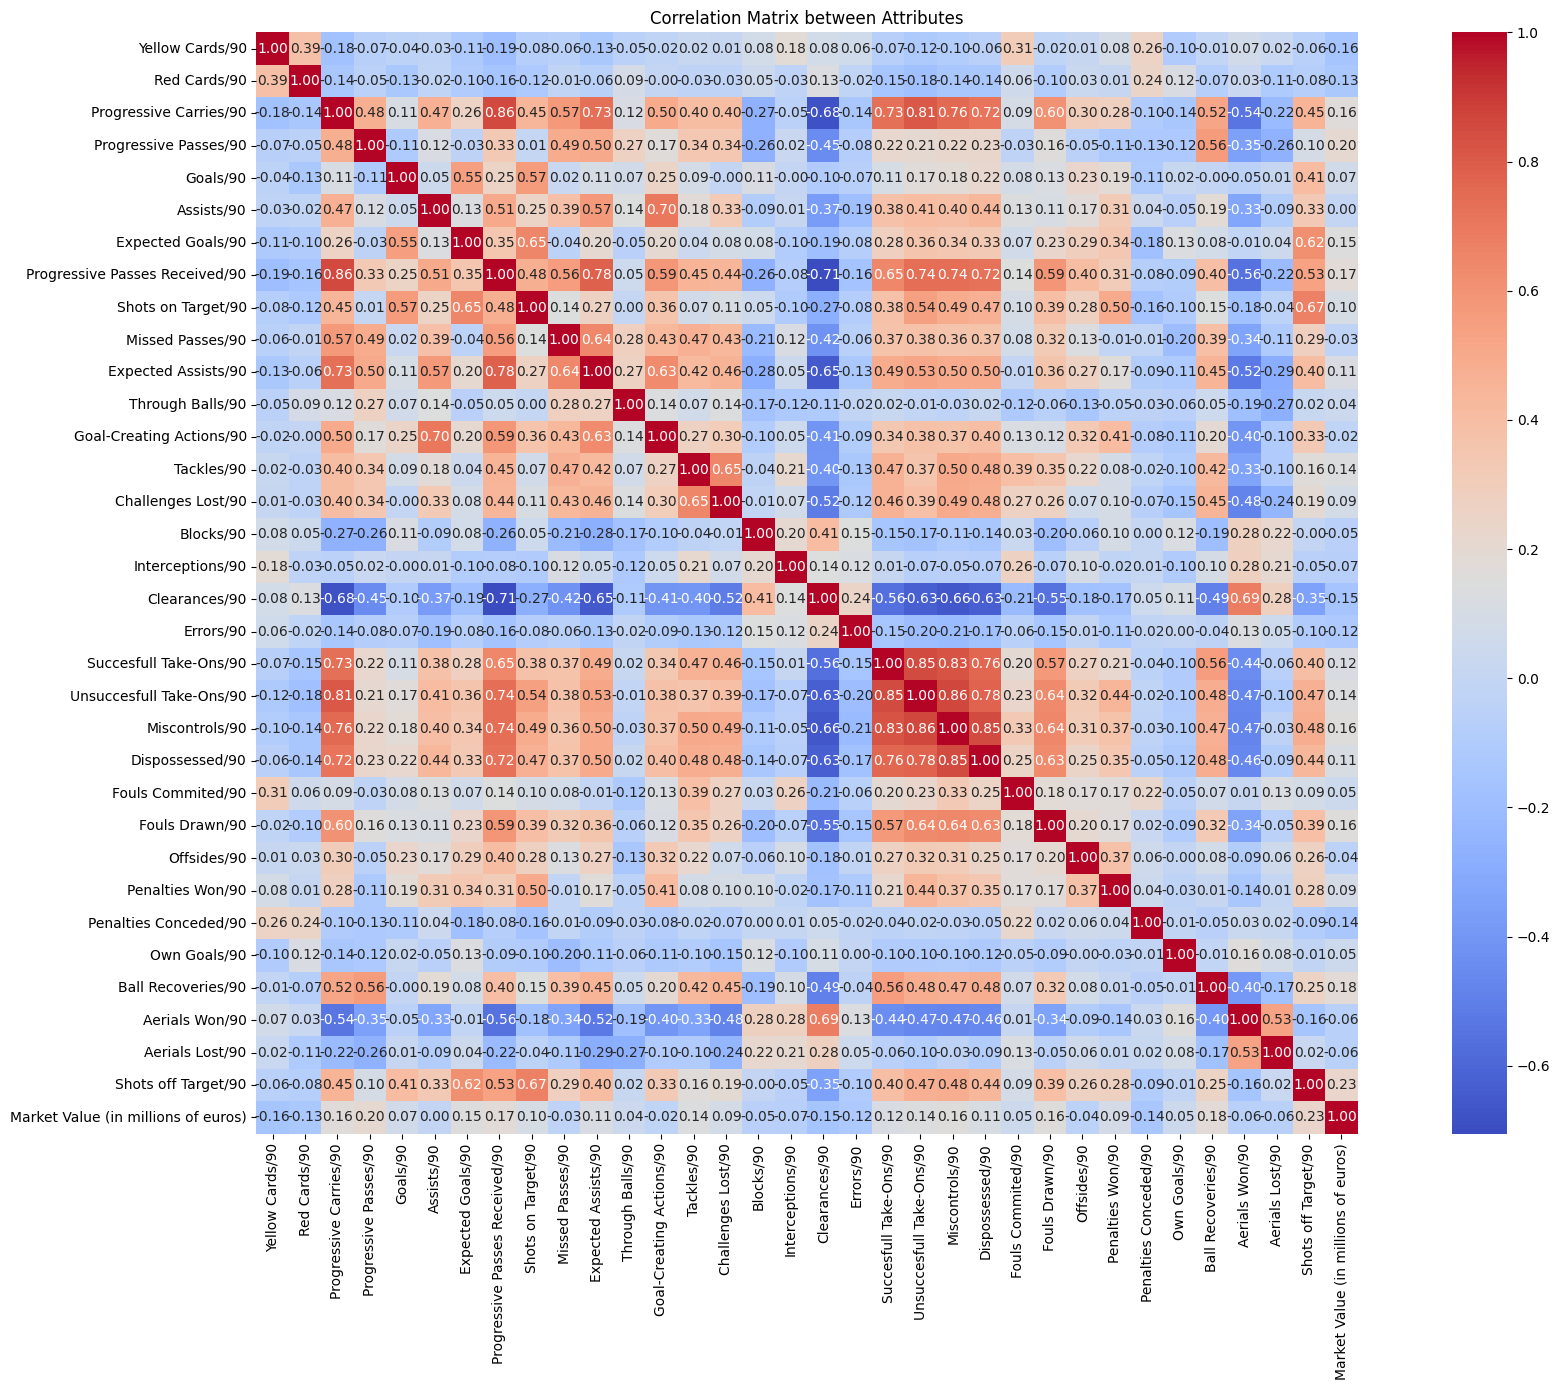

Highly correlated variables (|corr| > 0.70):
Miscontrols/90 ↔ Unsuccesfull Take-Ons/90 = 0.86
Progressive Passes Received/90 ↔ Progressive Carries/90 = 0.86
Unsuccesfull Take-Ons/90 ↔ Succesfull Take-Ons/90 = 0.85
Dispossessed/90 ↔ Miscontrols/90 = 0.85
Miscontrols/90 ↔ Succesfull Take-Ons/90 = 0.83
Unsuccesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.81
Expected Assists/90 ↔ Progressive Passes Received/90 = 0.78
Dispossessed/90 ↔ Unsuccesfull Take-Ons/90 = 0.78
Dispossessed/90 ↔ Succesfull Take-Ons/90 = 0.76
Miscontrols/90 ↔ Progressive Carries/90 = 0.76
Unsuccesfull Take-Ons/90 ↔ Progressive Passes Received/90 = 0.74
Miscontrols/90 ↔ Progressive Passes Received/90 = 0.74
Succesfull Take-Ons/90 ↔ Progressive Carries/90 = 0.73
Expected Assists/90 ↔ Progressive Carries/90 = 0.73
Dispossessed/90 ↔ Progressive Passes Received/90 = 0.72
Dispossessed/90 ↔ Progressive Carries/90 = 0.72
Clearances/90 ↔ Progressive Passes Received/90 = 0.71
Goal-Creating Actions/90 ↔ Assists/90 = 0.70


In [62]:
# Generate the correlation matrix
correlation_matrix = df[training_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix between Attributes")
plt.tight_layout()
plt.show()

# Define the high correlation threshold
threshold = 0.7

# Select the upper triangle of the matrix (upper triangle without diagonal)
upper = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.abs().shape), k=1).astype(bool))

# List pairs with correlation above the threshold
highly_correlated_pairs = [(col, row, upper.loc[row, col])
                           for col in upper.columns
                           for row in upper.index
                           if upper.loc[row, col] > threshold]

# Display the pairs
print("Highly correlated variables (|corr| > {:.2f}):".format(threshold))
for var1, var2, corr in sorted(highly_correlated_pairs, key=lambda x: -x[2]):
    print(f"{var1} ↔ {var2} = {corr:.2f}")

In [63]:
## Feature Engineering (unnecessary)

In [64]:
def evaluate_clustering(X, labels):
    # Mask for points that are not noise
    mask = labels != -1
    n_noise = np.sum(~mask)
    noise_proportion = n_noise / len(labels)

    # If less than 2 valid clusters, return a bad score
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return -1, noise_proportion

    # Silhouette (without counting -1)
    sil_score = silhouette_score(X[mask], labels[mask])

    return sil_score, noise_proportion

In [65]:
results = []

# Scale Market Value (highly variable values)
scaler = MinMaxScaler()
X = X.copy()
X['Market Value (in millions of euros)'] = scaler.fit_transform(X[['Market Value (in millions of euros)']])

# DBSCAN
for eps, min_sample in product(
    np.arange(0.5, 3.6, 0.1),
    np.arange(5, 11)
):
    clusterer = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1).fit(X)
    labels = clusterer.labels_

    sil_score, noise = evaluate_clustering(X, labels)

    if sil_score != -1:
        results.append({
            'eps': eps,
            'min_samples': min_sample,
            'silhouette': sil_score,
            'noise': noise
        })

# Create DataFrame with results
df_results = pd.DataFrame(results)

# Filter only models with sil_score != -1
df_valid = df_results[df_results['silhouette'] != -1].copy()

# Normalize with MinMaxScaler
scaler = MinMaxScaler()
df_valid[['silhouette_norm', 'noise_norm']] = scaler.fit_transform(
    df_valid[['silhouette', 'noise']]
)

# Calculate final score
df_valid['score_final'] = (
    0.7 * df_valid['silhouette_norm']
    - 0.3 * df_valid['noise_norm']
)

# Show the scores
print(df_valid[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

# Best model
best = df_valid.loc[df_valid['score_final'].idxmax()]
print("\n🔍 Best model:")
print(best[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

    eps  min_samples  silhouette     noise  score_final
0   1.6            5    0.270251  0.901235    -0.241193
1   1.7            5    0.247505  0.864198    -0.284071
2   1.7            6    0.250407  0.876543    -0.281878
3   1.7            7    0.263006  0.888889    -0.254615
4   1.9            5    0.384564  0.753086     0.118056
5   2.0            5    0.308521  0.685185    -0.049334
6   2.0            6    0.350139  0.722222     0.042330
7   2.1            7    0.404833  0.709877     0.189040
8   2.1            8    0.411658  0.716049     0.204031
9   2.1            9    0.411658  0.716049     0.204031
10  2.2            5    0.407768  0.561728     0.260345
11  2.2            7    0.255354  0.635802    -0.165548
12  2.2            8    0.298793  0.660494    -0.063866
13  2.2            9    0.337446  0.672840     0.030754
14  2.3            5    0.397089  0.512346     0.253976
15  2.4            5    0.417180  0.469136     0.324501
16  2.4            6    0.463826  0.512346     0

In [66]:
# Reexecute DBSCAN with the best parameters
best_eps = best['eps']
best_min_sample = best['min_samples']

# Recalculate labels of the best model
best_clusterer = DBSCAN(eps=best_eps, min_samples=int(best_min_sample), n_jobs=-1).fit(X)

best_labels = best_clusterer.labels_

df['Cluster'] = best_labels

In [67]:
## Visualize clusters and noises (PCA)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame to facilitate use with Plotly
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = best_labels.astype(str)  # To allow -1 (outliers)

# Change cluster name -1 to 'Outlier'
df_plot['Cluster'] = df_plot['Cluster'].replace({'-1': 'Outlier'})

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    symbol='Cluster',
    opacity=0.8,
    title=f"PCA 3D - Defenders (DBSCAN - eps={round(best_eps, 2)}, min_samples={best_min_sample})"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.update_layout(legend=dict(itemsizing='constant'))

fig.show()

In [68]:
# Definition of performance_df
df['performance_df'] = (
    df['Goals/90'] * 1.5 +
    df['Assists/90'] * 2 +
    df['Shots on Target/90'] * 0.5 +
    df['Goal-Creating Actions/90'] * 1 +
    df['Penalties Won/90'] * 0.5 +
    df['Expected Goals/90'] * 0.5 +
    df['Expected Assists/90'] * 0.75 +
    df['Shots off Target/90'] * 0.25 +
    df['Missed Passes/90'] * (-1) +
    df['Progressive Carries/90'] * 1.5 +
    df['Progressive Passes/90'] * 1.5 +
    df['Progressive Passes Received/90'] * 1 +
    df['Fouls Drawn/90'] * 1 +
    df['Aerials Won/90'] * 2 +
    df['Aerials Lost/90'] * (-2) +
    df['Succesfull Take-Ons/90'] * 1 +
    df['Unsuccesfull Take-Ons/90'] * (-1) +
    df['Offsides/90'] * (-0.25) +
    df['Through Balls/90'] * 1 +
    df['Yellow Cards/90'] * (-1) +
    df['Red Cards/90'] * (-3) +
    df['Fouls Commited/90'] * (-1) +
    df['Tackles/90'] * 2 +
    df['Challenges Lost/90'] * (-2) +
    df['Blocks/90'] * 2 +
    df['Interceptions/90'] * 2 +
    df['Clearances/90'] * 2 +
    df['Miscontrols/90'] * (-1) +
    df['Dispossessed/90'] * (-1) +
    df['Errors/90'] * (-2) +
    df['Own Goals/90'] * (-3) +
    df['Ball Recoveries/90'] * 2 +
    df['Penalties Conceded/90'] * (-3)
)

# Scale performance_df and Market Value
scaler = MinMaxScaler()

df[['performance_df_scaled', 'market_value_scaled']] = scaler.fit_transform(
    df[['performance_df', 'Market Value (in millions of euros)']]
)

df['cost_benefit'] = df['performance_df_scaled'] / (df['market_value_scaled'] + 1)  # 1 avoids very large results

df_filtered = df[df['Cluster'] != -1].copy()  # Remove outliers from comparison

# Group and calculate main statistics
summary = df_filtered.groupby('Cluster').agg(
    performance_df_mean=('performance_df_scaled', 'mean'),
    performance_df_std=('performance_df_scaled', 'std'),
    market_value_mean=('market_value_scaled', 'mean'),
    market_value_std=('market_value_scaled', 'std'),
    n_players=('Player', 'count')
)

# Calculate cost-benefit ratio
summary['cost_benefit'] = (
    summary['performance_df_mean'] /
    (
        summary['market_value_mean'] *
        (1 + summary['performance_df_std']) *
        (1 + summary['market_value_std'])
    )
)

# Reorganize columns
summary = summary[[
    'performance_df_mean',
    'performance_df_std',
    'market_value_mean',
    'n_players',
    'cost_benefit'
]]

summary = summary.sort_values(by='cost_benefit', ascending=False)

print(summary)

         performance_df_mean  performance_df_std  market_value_mean  \
Cluster                                                               
1                   0.513512            0.166501           0.089906   
0                   0.426246            0.164733           0.094492   

         n_players  cost_benefit  
Cluster                           
1               79      4.301863  
0               44      3.510753  


In [69]:
## Find outliers closest to the ideal cluster

cluster_id_good = summary['cost_benefit'].idxmax()

# Separate vectors of the ideal cluster and outliers
idx_cluster = np.where(best_labels == cluster_id_good)[0]
idx_outliers = np.where(best_labels == -1)[0]

X_cluster = X.iloc[idx_cluster]
X_outliers = X.iloc[idx_outliers]

# Calculate centroid of the good cluster
centroid_cluster = X_cluster.mean(axis=0)

# Calculate distance of outliers to the ideal cluster
distances = [distance.euclidean(centroid_cluster, x) for x in X_outliers.values]

# Top N outliers closest to the ideal cluster
top_n = 20
index_top_outliers = np.argsort(distances)[:top_n]

# Show the players
df_outliers = df.iloc[idx_outliers].copy()
df_outliers['Distance'] = distances
outliers_closest = df_outliers.iloc[index_top_outliers]

print(outliers_closest[['Player', 'performance_df', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance']])

                Player  performance_df  Market Value (in millions of euros)  \
32           Lucas Kal         14.9850                                1.300   
28          Martinelli         17.5850                               14.000   
86              Jadsom         17.8550                                3.500   
113        Léo Pereira         20.8200                                9.000   
91       Bruno Pacheco         18.9550                                0.300   
3             Jonathan         18.2200                                0.150   
44          Igor Gomes         19.9925                                3.000   
83            Fernando         16.9250                                0.400   
111       Matheus Bidu         30.8900                                2.000   
66              Mádson         18.5900                                0.200   
84   Gabriel Inocêncio         22.6850                                0.250   
127      Renzo Saravia         25.0375              

In [70]:
## Verify cost-benefit of all players and rank them

# Create a table with players, cost_benefit, and cluster
cost_benefit_table = df[['Player', 'cost_benefit', 'Cluster']].copy()

# Sort by the cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Show the top 50 rows
print(cost_benefit_table.head(50))

                             Player  cost_benefit  Cluster
0                  Rodrigo Fagundes      0.937115        1
1                              Renê      0.894716       -1
2                          Gilberto      0.857414       -1
3                      Matheus Bidu      0.838923       -1
4                             Mayke      0.838524       -1
5                     Alix Vinicius      0.817245        1
6                   Fabricio Bustos      0.751738       -1
7   Luis Eduardo Marques dos Santos      0.739996        0
8                    Santiago Arias      0.728656       -1
9                      Kaique Rocha      0.720073        1
10                     João Marcelo      0.705769        1
11                      Bruno Fuchs      0.704681        1
12                   Antonio Carlos      0.702299        1
13                              EDU      0.698127        1
14                         Fernando      0.685404        1
15                          Gabriel      0.685255       

In [71]:
## Hybrid score to define good and cheap outliers according to original cost-benefit
## and proximity to the good and cheap cluster

# Scale Distance
scaler = MinMaxScaler()
df_outliers['distance_scaled'] = scaler.fit_transform(df_outliers[['Distance']])

# Calculate the hybrid score
df_outliers['score'] = df_outliers['cost_benefit'] / (df_outliers['distance_scaled'] + 1)  # 1 avoids very large results

# Show the top 50 outliers with the highest score
top_50_outliers = df_outliers.sort_values(by='score', ascending=False).head(50)

# Visualize
print(top_50_outliers[['Player', 'Squad', 'performance_df', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance', 'score']])

                         Player                 Squad  performance_df  \
111                Matheus Bidu           Corinthians         30.8900   
41                        Mayke             Palmeiras         31.2050   
14                     Gilberto                 Bahia         31.6800   
128                        Renê         Internacional         31.3700   
76              Fabricio Bustos         Internacional         29.7800   
8                  Willean Lepo               Vitória         24.8025   
127               Renzo Saravia      Atlético Mineiro         25.0375   
158              Santiago Arias                 Bahia         28.1600   
12                Michel Araujo             São Paulo         25.5600   
84            Gabriel Inocêncio             Juventude         22.6850   
90              Fernando Marçal         Botafogo (RJ)         24.0150   
19               Paulo Henrique         Vasco da Gama         24.0800   
60   José Luis Rodríguez Bebanz         Vasco da Ga

In [72]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest()
y_pred_if = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_IF'] = y_pred_if

# Count outliers
n_outliers = (y_pred_if == -1).sum()
n_normals = (y_pred_if == 1).sum()
outlier_rate = n_outliers / len(y_pred_if)

# Display results
print(f"[IForest] Total outliers detected: {n_outliers}")
print(f"[IForest] Outlier rate: {outlier_rate:.2%}")

[IForest] Total outliers detected: 9
[IForest] Outlier rate: 5.56%


In [73]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_IF'] = pd.Series(y_pred_if).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_IF',
    symbol='Outlier_IF',
    opacity=0.7,
    title="Outliers - Defenders (Isolation Forest) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [74]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by Isolation Forest (Anomaly == -1)
outliers = df[df['Outlier_IF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_df', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_IF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

               Player             Squad  performance_df  \
0              Wesley          Flamengo         33.3475   
1    Brahian Palacios  Atlético Mineiro         23.0325   
2              Rubens  Atlético Mineiro         24.2800   
3      Gustavo Scarpa  Atlético Mineiro         23.7350   
4             Alisson  Atlético Mineiro         23.6350   
5  Alexandro Bernabei     Internacional         22.3500   
6          Marquinhos        Fluminense         18.0250   
7                Cadu  Atlético Mineiro         14.3850   
8             Mariano  Atlético Mineiro         12.9525   

   Market Value (in millions of euros)  cost_benefit  Outlier_IF  
0                               25.000      0.545496          -1  
1                                1.500      0.529842          -1  
2                                8.000      0.481513          -1  
3                                7.500      0.469162          -1  
4                                9.000      0.447781          -1  
5      

In [75]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.05)
y_pred_lof = lof.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_LOF'] = y_pred_lof

# Count outliers
n_outliers = (y_pred_lof == -1).sum()
outlier_rate = n_outliers / len(y_pred_lof)

# Display results
print(f"[LOF] Total outliers detected: {n_outliers}")
print(f"[LOF] Outlier rate: {outlier_rate:.2%}")

[LOF] Total outliers detected: 9
[LOF] Outlier rate: 5.56%


In [76]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_LOF'] = pd.Series(y_pred_lof).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_LOF',
    symbol='Outlier_LOF',
    opacity=0.7,
    title="Outliers - Defenders (Local Outlier Factor (LOF)) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()

In [77]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by LOF (Anomaly == -1)
outliers = df[df['Outlier_LOF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_df', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_LOF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

             Player             Squad  performance_df  \
0              Renê     Internacional         31.3700   
1          Fernando     Internacional         26.2925   
2            Wesley          Flamengo         33.3475   
3  Brahian Palacios  Atlético Mineiro         23.0325   
4    Gustavo Scarpa  Atlético Mineiro         23.7350   
5           Alisson  Atlético Mineiro         23.6350   
6        Marquinhos        Fluminense         18.0250   
7        Martinelli        Fluminense         17.5850   
8              Cadu  Atlético Mineiro         14.3850   

   Market Value (in millions of euros)  cost_benefit  Outlier_LOF  
0                                  0.7      0.894716           -1  
1                                  0.5      0.685404           -1  
2                                 25.0      0.545496           -1  
3                                  1.5      0.529842           -1  
4                                  7.5      0.469162           -1  
5                    

In [78]:
# One-Class SVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu is the proportion of outliers
y_pred_ocsvm = ocsvm.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_OCSVM'] = y_pred_ocsvm

# Count outliers
n_outliers = (y_pred_ocsvm == -1).sum()
outlier_rate = n_outliers / len(y_pred_ocsvm)

# Display results
print(f"[One-Class SVM] Total outliers detected: {n_outliers}")
print(f"[One-Class SVM] Outlier rate: {outlier_rate:.2%}")

[One-Class SVM] Total outliers detected: 7
[One-Class SVM] Outlier rate: 4.32%


In [79]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_OCSVM'] = pd.Series(y_pred_ocsvm).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_OCSVM',
    symbol='Outlier_OCSVM',
    opacity=0.7,
    title="Outliers - Defenders (One-Class SVM) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()

In [80]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by One-Class SVM (Anomaly == -1)
outliers = df[df['Outlier_OCSVM'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_df', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_OCSVM']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

             Player             Squad  performance_df  \
0              Renê     Internacional         31.3700   
1          Fernando     Internacional         26.2925   
2  Brahian Palacios  Atlético Mineiro         23.0325   
3    Gustavo Scarpa  Atlético Mineiro         23.7350   
4      Marcos Rocha         Palmeiras         21.0400   
5           Alisson  Atlético Mineiro         23.6350   
6              Kanu             Bahia         19.7950   

   Market Value (in millions of euros)  cost_benefit  Outlier_OCSVM  
0                                  0.7      0.894716             -1  
1                                  0.5      0.685404             -1  
2                                  1.5      0.529842             -1  
3                                  7.5      0.469162             -1  
4                                  0.3      0.465858             -1  
5                                  9.0      0.447781             -1  
6                                  3.5      0.373260 

In [81]:
# DF with Clusters and Anomalies
df
df.to_excel("output_data/df_clusters.xlsx", index=False)

### MODELING (GOALKEEPERS)

In [82]:
# Load the sheet of goalkeepers
df = pd.read_excel("output_data/data_players_br_2024.xlsx", sheet_name="GK")
df.columns

Index(['Player ID', 'Player', 'Nation', 'Position', 'Age at season start',
       'Year of birth', 'Squad', 'Minutes Played', 'Minutes Played/90',
       'Completed Matches', 'Penalty Goals', 'Penalties Missed',
       'Yellow Cards/90', 'Red Cards/90', 'Progressive Carries/90',
       'Progressive Passes/90', 'Goals/90', 'Assists/90', 'Expected Goals/90',
       'Progressive Passes Received/90', 'Shots on Target/90',
       'Missed Passes/90', 'Expected Assists/90', 'Through Balls/90',
       'Goal-Creating Actions/90', 'Tackles/90', 'Challenges Lost/90',
       'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Errors/90',
       'Succesfull Take-Ons/90', 'Unsuccesfull Take-Ons/90', 'Miscontrols/90',
       'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
       'Penalties Won/90', 'Penalties Conceded/90', 'Own Goals/90',
       'Ball Recoveries/90', 'Aerials Won/90', 'Aerials Lost/90',
       'Shots off Target/90', 'Goals Against/90', 'Saves/90',
       'Clea

In [83]:
# Remove unnecessary variables to form clusters of goalkeepers
unused_columns_gk = ['Penalty Goals', 'Penalties Missed', 'Progressive Carries/90', 'Progressive Passes/90', 'Goals/90', 'Assists/90', 'Expected Goals/90',
                         'Progressive Passes Received/90', 'Shots on Target/90', 'Expected Assists/90', 'Through Balls/90', 'Goal-Creating Actions/90',
                         'Tackles/90', 'Challenges Lost/90', 'Blocks/90', 'Interceptions/90', 'Clearances/90', 'Succesfull Take-Ons/90',
                         'Unsuccesfull Take-Ons/90', 'Miscontrols/90', 'Dispossessed/90', 'Fouls Commited/90', 'Fouls Drawn/90', 'Offsides/90',
                         'Penalties Won/90', 'Ball Recoveries/90', 'Aerials Won/90', 'Aerials Lost/90', 'Shots off Target/90']

df.drop(columns=unused_columns_gk, inplace=True)

# Remove unwanted columns for training
unused_columns = [
    "Player ID", "Player", "Nation", "Position", "Age at season start",
    "Year of birth", "Squad", "Minutes Played", "Minutes Played/90", "Completed Matches"
]

# Select desired columns for training
training_columns = [col for col in df.columns if col not in unused_columns]

X = df[training_columns]

X

,Yellow Cards/90,Red Cards/90,Missed Passes/90,Errors/90,Penalties Conceded/90,Own Goals/90,Goals Against/90,Saves/90,Clean Sheets/Complete Matches Played,Non-Clean Sheets/Complete Matches Played,Penalties Allowed,Penalties Saved,Post-Shot Expected Goals/90,Not Stopped Crosses/90,Crosses Stopped/90,Defensive Actions Outside Penalty Area/90,Market Value (in millions of euros)
0,0.11,0.00,6.30,0.11,0.03,0.00,1.00,3.54,0.35,0.65,4,0,1.39,13.59,0.76,0.70,0.10
1,0.11,0.00,8.73,0.08,0.00,0.03,1.41,3.03,0.22,0.78,3,0,1.19,16.68,0.81,0.41,2.50
2,0.12,0.00,4.35,0.18,0.00,0.00,1.29,3.00,0.35,0.65,1,0,1.35,13.41,0.65,0.65,0.45
3,0.09,0.00,6.68,0.03,0.00,0.00,0.74,2.68,0.47,0.53,5,1,0.97,12.00,0.71,1.35,8.00
4,0.06,0.00,6.13,0.12,0.00,0.00,1.29,3.18,0.27,0.73,2,1,1.26,12.76,1.44,2.13,3.50
5,0.05,0.00,9.00,0.08,0.00,0.00,1.03,4.11,0.34,0.66,5,0,1.38,15.82,1.16,0.34,0.50
6,0.04,0.00,4.88,0.04,0.00,0.00,1.08,2.68,0.32,0.68,2,0,0.95,10.44,0.64,0.48,0.50
7,0.14,0.00,7.14,0.00,0.14,0.00,0.57,2.86,0.57,0.43,0,1,0.93,11.43,0.86,0.29,11.00
8,0.06,0.03,8.59,0.03,0.00,0.00,1.41,2.97,0.19,0.81,4,3,1.33,12.47,1.16,0.78,1.80
9,0.00,0.00,7.29,0.00,0.00,0.00,1.71,3.86,0.00,1.00,1,1,1.46,16.00,0.14,0.14,1.50


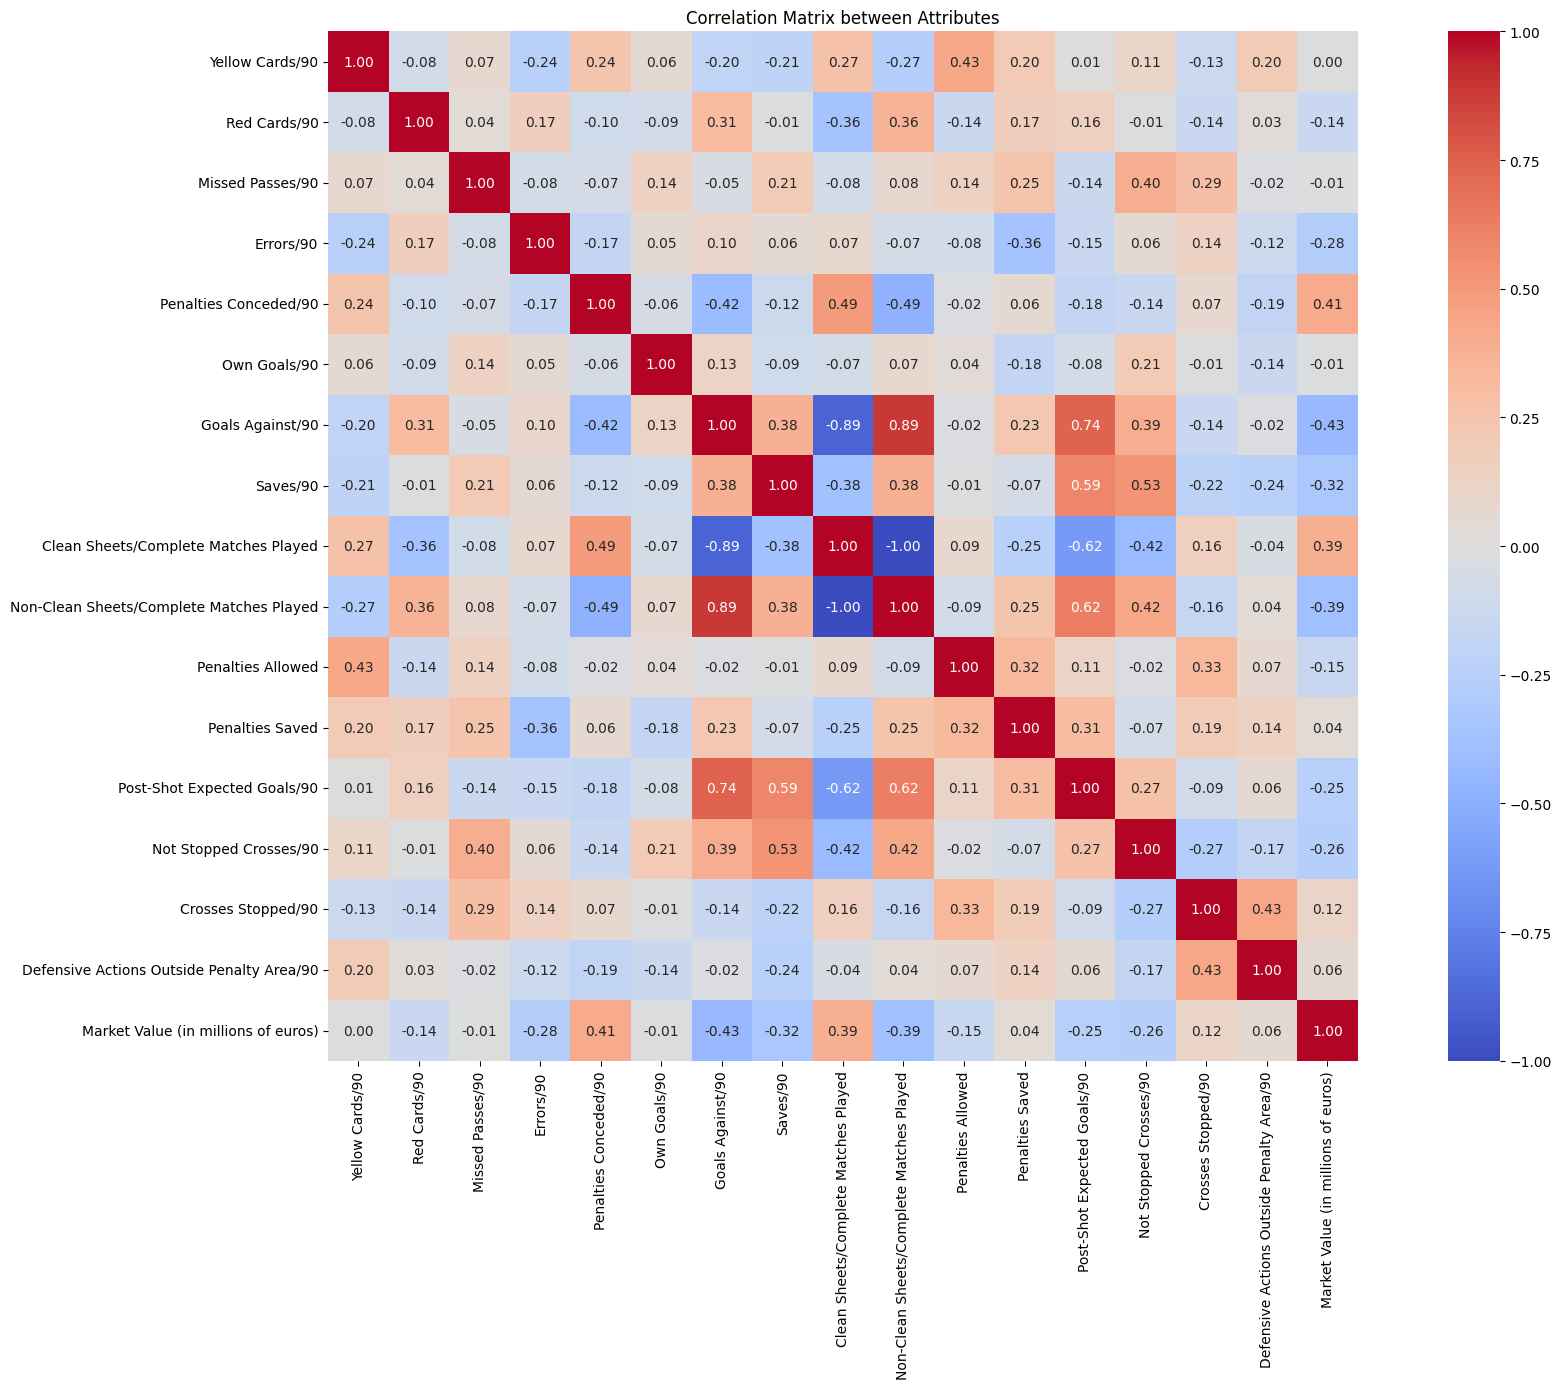

Highly correlated variables (|corr| > 0.70):
Non-Clean Sheets/Complete Matches Played ↔ Clean Sheets/Complete Matches Played = 1.00
Non-Clean Sheets/Complete Matches Played ↔ Goals Against/90 = 0.89
Clean Sheets/Complete Matches Played ↔ Goals Against/90 = 0.89
Post-Shot Expected Goals/90 ↔ Goals Against/90 = 0.74


In [84]:
# Generate the correlation matrix
correlation_matrix = df[training_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix between Attributes")
plt.tight_layout()
plt.show()

# Define the high correlation threshold
threshold = 0.7

# Select the upper triangle of the matrix (upper triangle without diagonal)
upper = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.abs().shape), k=1).astype(bool))

# List pairs with correlation above the threshold
highly_correlated_pairs = [(col, row, upper.loc[row, col])
                           for col in upper.columns
                           for row in upper.index
                           if upper.loc[row, col] > threshold]

# Display the pairs
print("Highly correlated variables (|corr| > {:.2f}):".format(threshold))
for var1, var2, corr in sorted(highly_correlated_pairs, key=lambda x: -x[2]):
    print(f"{var1} ↔ {var2} = {corr:.2f}")

In [85]:
## Feature Engineering (unnecessary)

In [86]:
def evaluate_clustering(X, labels):
    # Mask for points that are not noise
    mask = labels != -1
    n_noise = np.sum(~mask)
    proportion_noise = n_noise / len(labels)

    # If less than 2 valid clusters, return a bad score
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return -1, proportion_noise

    # Silhouette (excluding -1)
    sil_score = silhouette_score(X[mask], labels[mask])

    return sil_score, proportion_noise

In [87]:
results = []

# Scale Market Value (highly variable values)
scaler = MinMaxScaler()
X = X.copy()
X['Market Value (in millions of euros)'] = scaler.fit_transform(X[['Market Value (in millions of euros)']])

# DBSCAN
for eps, min_sample in product(
    np.arange(0.5, 3.6, 0.1),
    np.arange(5, 11)
):
    clusterer = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1).fit(X)
    labels = clusterer.labels_

    sil_score, noise = evaluate_clustering(X, labels)

    if sil_score != -1:
        results.append({
            'eps': eps,
            'min_samples': min_sample,
            'silhouette': sil_score,
            'noise': noise
        })

# Create DataFrame with results
df_results = pd.DataFrame(results)

# Filter only models with sil_score != -1
df_valid = df_results[df_results['silhouette'] != -1].copy()

# Normalize with MinMaxScaler
scaler = MinMaxScaler()
df_valid[['silhouette_norm', 'noise_norm']] = scaler.fit_transform(
    df_valid[['silhouette', 'noise']]
)

# Calculate final score
df_valid['score_final'] = (
    0.7 * df_valid['silhouette_norm']
    - 0.3 * df_valid['noise_norm']
)

# Show the scores
print(df_valid[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

# Best model
best = df_valid.loc[df_valid['score_final'].idxmax()]
print("\n🔍 Best model:")
print(best[['eps', 'min_samples', 'silhouette', 'noise', 'score_final']])

   eps  min_samples  silhouette     noise  score_final
0  2.8            5    0.482809  0.629630     0.400000
1  2.9            5    0.441623  0.592593     0.267336
2  3.0            6    0.355213  0.481481     0.007034
3  3.1            5    0.293964  0.111111    -0.020000
4  3.1            6    0.310769  0.370370    -0.097709
5  3.2            5    0.295978  0.074074     0.007465
6  3.3            5    0.295978  0.074074     0.007465

🔍 Best model:
eps            2.800000
min_samples    5.000000
silhouette     0.482809
noise          0.629630
score_final    0.400000
Name: 0, dtype: float64


In [88]:
# Reexecute DBSCAN with the best parameters
best_eps = best['eps']
best_min_sample = best['min_samples']

# Recalculate labels of the best model
best_clusterer = DBSCAN(eps=best_eps, min_samples=int(best_min_sample), n_jobs=-1).fit(X)
best_labels = best_clusterer.labels_

df['Cluster'] = best_labels

In [89]:
## Visualize clusters and noise (PCA)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame to facilitate use with Plotly
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = best_labels.astype(str)  # To allow -1 (outliers)

# Change cluster name -1 to 'Outlier'
df_plot['Cluster'] = df_plot['Cluster'].replace({'-1': 'Outlier'})

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    symbol='Cluster',
    opacity=0.8,
    title=f"PCA 3D - Goalkeepers (DBSCAN - eps={round(best_eps, 2)}, min_samples={best_min_sample})"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.update_layout(legend=dict(itemsizing='constant'))

fig.show()

In [90]:
# Definition of performance_gk
df['performance_gk'] = (
    df['Yellow Cards/90'] * (-0.5) +
    df['Red Cards/90'] * (-2) +
    df['Missed Passes/90'] * (-0.5) +
    df['Errors/90'] * (-1) +
    df['Penalties Conceded/90'] * (-2) +
    df['Own Goals/90'] * (-2) +
    df['Goals Against/90'] * (-3) +
    df['Saves/90'] * 5 +
    df['Clean Sheets/Complete Matches Played'] * 4 +
    df['Non-Clean Sheets/Complete Matches Played'] * (-1.5) +
    df['Penalties Allowed'] * (-1.5) +
    df['Penalties Saved'] * 5 +
    df['Post-Shot Expected Goals/90'] * (-1) +
    df['Not Stopped Crosses/90'] * (-0.5) +
    df['Crosses Stopped/90'] * 0.5 +
    df['Defensive Actions Outside Penalty Area/90'] * 0.5
)

# Scale performance_gk and Market Value
scaler = MinMaxScaler()

df[['performance_gk_scaled', 'market_value_scaled']] = scaler.fit_transform(
    df[['performance_gk', 'Market Value (in millions of euros)']]
)

df['cost_benefit'] = df['performance_gk_scaled'] / (df['market_value_scaled'] + 1)  # 1 avoids very large results

df_filtered = df[df['Cluster'] != -1].copy()  # Remove outliers from comparison

# Group and calculate main statistics
summary = df_filtered.groupby('Cluster').agg(
    performance_gk_mean=('performance_gk_scaled', 'mean'),
    performance_gk_std=('performance_gk_scaled', 'std'),
    market_value_mean=('market_value_scaled', 'mean'),
    market_value_std=('market_value_scaled', 'std'),
    n_players=('Player', 'count')
)

# Calculate cost-benefit ratio
summary['cost_benefit'] = (
    summary['performance_gk_mean'] /
    (
        summary['market_value_mean'] *
        (1 + summary['performance_gk_std']) *
        (1 + summary['market_value_std'])
    )
)

# Reorganize columns
summary = summary[[
    'performance_gk_mean',
    'performance_gk_std',
    'market_value_mean',
    'n_players',
    'cost_benefit'
]]

summary = summary.sort_values(by='cost_benefit', ascending=False)

print(summary)

         performance_gk_mean  performance_gk_std  market_value_mean  \
Cluster                                                               
1                   0.554538            0.269326           0.224771   
0                   0.388989            0.171402           0.409174   

         n_players  cost_benefit  
Cluster                           
1                5      1.567871  
0                5      0.582231  


In [91]:
## Find outliers closest to the ideal cluster

cluster_id_good = summary['cost_benefit'].idxmax()

# Separate vectors of the ideal cluster and outliers
idx_cluster = np.where(best_labels == cluster_id_good)[0]
idx_outliers = np.where(best_labels == -1)[0]

X_cluster = X.iloc[idx_cluster]
X_outliers = X.iloc[idx_outliers]

# Calculate centroid of the good cluster
centroid_cluster = X_cluster.mean(axis=0)

# Calculate distance of outliers to the ideal cluster
distances = [distance.euclidean(centroid_cluster, x) for x in X_outliers.values]

# Top N outliers closest to the ideal cluster
top_n = 20
index_top_outliers = np.argsort(distances)[:top_n]

# Show the players
df_outliers = df.iloc[idx_outliers].copy()
df_outliers['Distance'] = distances
outliers_closest = df_outliers.iloc[index_top_outliers]

print(outliers_closest[['Player', 'performance_gk', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance']])

                Player  performance_gk  Market Value (in millions of euros)  \
20  Cleiton Schwengber           9.170                                 3.00   
1        Lucas Arcanjo          -7.350                                 2.50   
7                Bento           9.235                                11.00   
2             Anderson           0.235                                 0.45   
19      Matheus Mendes           5.195                                 0.30   
21              Cássio           3.740                                 0.30   
11            Wéverton           2.585                                 1.00   
25             Gustavo           2.955                                 0.30   
23       Agustín Rossi           5.535                                 8.00   
8              Ronaldo           8.155                                 1.80   
10       Sergio Rochet          -3.870                                 3.00   
5   João Ricardo Riedi          -2.815              

In [92]:
## Verify cost-benefit of all players and rank them

# Create a table with players, cost_benefit, and cluster
cost_benefit_table = df[['Player', 'cost_benefit', 'Cluster']].copy()

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the top 50 rows
print(cost_benefit_table.head(50))

                Player  cost_benefit  Cluster
0               Mycael      0.819549        1
1              Ronaldo      0.731156       -1
2   Cleiton Schwengber      0.711279       -1
3       Matheus Mendes      0.671516       -1
4               Cássio      0.593632       -1
5              Gustavo      0.551612       -1
6        Marcos Felipe      0.510859        0
7      Matheus Donelli      0.509873        1
8             Wéverton      0.500259       -1
9    Agustín Marchesín      0.473009       -1
10               Bento      0.452031       -1
11       Agustín Rossi      0.407226       -1
12            Anderson      0.400601       -1
13        Rafael Pires      0.350191       -1
14             Jandrei      0.340638        1
15          Léo Jardim      0.312939        1
16               Fábio      0.307713        0
17      Leonardo Linck      0.302156        1
18             Éverson      0.283962        0
19                John      0.245252        0
20  João Ricardo Riedi      0.2384

In [93]:
## Hybrid score to define good and cheap outliers according to original cost-benefit
## and proximity to the good and cheap cluster

# Scale Distance
scaler = MinMaxScaler()
df_outliers['distance_scaled'] = scaler.fit_transform(df_outliers[['Distance']])

# Calculate the hybrid score
df_outliers['score'] = df_outliers['cost_benefit'] / (df_outliers['distance_scaled'] + 1)  # 1 avoids very large results

# Display the top 50 outliers with the highest score
top_50_outliers = df_outliers.sort_values(by='score', ascending=False).head(50)

# Visualize
print(top_50_outliers[['Player', 'Squad', 'performance_gk', 'Market Value (in millions of euros)', 'cost_benefit', 'Distance', 'score']])

                Player                 Squad  performance_gk  \
20  Cleiton Schwengber         RB Bragantino           9.170   
19      Matheus Mendes      Atlético Mineiro           5.195   
8              Ronaldo        Atl Goianiense           8.155   
21              Cássio  Cruzeiro/Corinthians           3.740   
25             Gustavo              Criciúma           2.955   
11            Wéverton             Palmeiras           2.585   
7                Bento        Ath Paranaense           9.235   
2             Anderson              Cruzeiro           0.235   
23       Agustín Rossi              Flamengo           5.535   
12   Agustín Marchesín                Grêmio           1.805   
6         Rafael Pires             São Paulo          -0.690   
5   João Ricardo Riedi             Fortaleza          -2.815   
10       Sergio Rochet         Internacional          -3.870   
14              Walter                Cuiabá          -4.195   
26             Gabriel             Juven

In [94]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest()
y_pred_if = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_IF'] = y_pred_if

# Count outliers
n_outliers = (y_pred_if == -1).sum()
n_normals = (y_pred_if == 1).sum()
outlier_rate = n_outliers / len(y_pred_if)

# Display results
print(f"[IForest] Total outliers detected: {n_outliers}")
print(f"[IForest] Outlier rate: {outlier_rate:.2%}")

[IForest] Total outliers detected: 2
[IForest] Outlier rate: 7.41%


In [95]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_IF'] = pd.Series(y_pred_if).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_IF',
    symbol='Outlier_IF',
    opacity=0.7,
    title="Outliers - Goalkeepers (Isolation Forest) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [96]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by Isolation Forest (Anomaly == -1)
outliers = df[df['Outlier_IF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_gk', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_IF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

            Player           Squad  performance_gk  \
0  Matheus Donelli     Corinthians           3.205   
1            Bento  Ath Paranaense           9.235   

   Market Value (in millions of euros)  cost_benefit  Outlier_IF  
0                                  1.5      0.509873          -1  
1                                 11.0      0.452031          -1  


In [97]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.05)
y_pred_lof = lof.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_LOF'] = y_pred_lof

# Count outliers
n_outliers = (y_pred_lof == -1).sum()
outlier_rate = n_outliers / len(y_pred_lof)

# Display results
print(f"[LOF] Total outliers detected: {n_outliers}")
print(f"[LOF] Outlier rate: {outlier_rate:.2%}")

[LOF] Total outliers detected: 2
[LOF] Outlier rate: 7.41%


In [98]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_LOF'] = pd.Series(y_pred_lof).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_LOF',
    symbol='Outlier_LOF',
    opacity=0.7,
    title="Outliers - Goalkeepers (Local Outlier Factor (LOF)) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()


In [99]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by LOF (Anomaly == -1)
outliers = df[df['Outlier_LOF'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_gk', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_LOF']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

    Player          Squad  performance_gk  \
0  Gabriel      Juventude          -3.415   
1    Lucão  RB Bragantino          -4.840   

   Market Value (in millions of euros)  cost_benefit  Outlier_LOF  
0                                  0.7      0.203309           -1  
1                                  1.5      0.121249           -1  


In [100]:
# One-Class SVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu is the proportion of outliers
y_pred_ocsvm = ocsvm.fit_predict(X)  # -1 = outlier, 1 = normal

# Add to DataFrame
df['Outlier_OCSVM'] = y_pred_ocsvm

# Count outliers
n_outliers = (y_pred_ocsvm == -1).sum()
outlier_rate = n_outliers / len(y_pred_ocsvm)

# Display results
print(f"[One-Class SVM] Total outliers detected: {n_outliers}")
print(f"[One-Class SVM] Outlier rate: {outlier_rate:.2%}")

[One-Class SVM] Total outliers detected: 2
[One-Class SVM] Outlier rate: 7.41%


In [101]:
# PCA with 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_plot['Outlier_OCSVM'] = pd.Series(y_pred_ocsvm).map({1: 'Normal', -1: 'Outlier'}).astype(str)

# Interactive 3D plot
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Outlier_OCSVM',
    symbol='Outlier_OCSVM',
    opacity=0.7,
    title="Outliers - Goalkeepers (One-Class SVM) - PCA 3D"
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.show()

In [102]:
## Between outliers, check those with the highest cost_benefit

# Filter only the outliers detected by One-Class SVM (Anomaly == -1)
outliers = df[df['Outlier_OCSVM'] == -1].copy()

# Create the table with players, cost_benefit and anomaly
cost_benefit_table = outliers[['Player', 'Squad', 'performance_gk', 'Market Value (in millions of euros)', 'cost_benefit', 'Outlier_OCSVM']]

# Sort by cost_benefit column (from highest to lowest)
cost_benefit_table = cost_benefit_table.sort_values(by='cost_benefit', ascending=False).reset_index(drop=True)

# Display the table
print(cost_benefit_table)

     Player      Squad  performance_gk  Market Value (in millions of euros)  \
0  Wéverton  Palmeiras           2.585                                  1.0   
1   Gabriel  Juventude          -3.415                                  0.7   

   cost_benefit  Outlier_OCSVM  
0      0.500259             -1  
1      0.203309             -1  


In [103]:
# GK with Clusters and Anomalies
df
df.to_excel("output_data/gk_clusters.xlsx", index=False)